In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_campaign = pd.read_csv('/content/drive/MyDrive/Bim/[Bim] Jobs/[Portfolio] DA/5. movie_ticket/movie_ticket_dataset/campaign.csv')
df_customer = pd.read_csv('/content/drive/MyDrive/Bim/[Bim] Jobs/[Portfolio] DA/5. movie_ticket/movie_ticket_dataset/customer.csv')
df_device = pd.read_csv('/content/drive/MyDrive/Bim/[Bim] Jobs/[Portfolio] DA/5. movie_ticket/movie_ticket_dataset/device_detail.csv')
df_status = pd.read_csv('/content/drive/MyDrive/Bim/[Bim] Jobs/[Portfolio] DA/5. movie_ticket/movie_ticket_dataset/status_detail.csv')
df_ticket = pd.read_csv('/content/drive/MyDrive/Bim/[Bim] Jobs/[Portfolio] DA/5. movie_ticket/movie_ticket_dataset/ticket_history.csv')

# DATA CLEANING

In [ ]:
# Quy trình Data Cleaning
# 1/. Kiểm tra Data Type (ví dụ: ngày mà để thành văn bản)
# 2/. Kiểm tra giá trị NULL (Có NULL không và tại sao NULL)
# 3/. Kiểm tra dữ liệu có bị duplicates không?
# 4/. Kiểm tra giá trị NULL (Có NULL không và tại sao NULL) - Sau khi Merge

## CLEANING DATA TYPE

In [ ]:
# chuyển dob của df_customer từ object --> datatime
# chuyển time của df_ticket từ object --> datatime

In [ ]:
# chuyển dob của df_customer từ object --> datatime
df_customer['dob'] = pd.to_datetime(df_customer['dob'])

# chuyển time của df_ticket từ object --> datatime
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

## CLEANING NULL IN INDIVIDUALS

In [ ]:
# Tạo hàm kiểm tra giá trị NULL
def calc_null_rate(df):
    null_df = df.isnull().sum().to_frame(name='null_count')
    null_df['null_rate'] = null_df['null_count'] / len(df)
    return null_df.sort_values(by='null_rate', ascending=False)

In [ ]:
# 2/. Kiểm tra giá trị NULL (Có NULL không và tại sao NULL)

# Kết luận:
# 1/. Có giá trị NULL ở df_device - Lỗi hệ thống ghi nhận
calc_null_rate(df_device)

df_device = df_device.fillna({'model': 'unknown'})
df_device = df_device[df_device['device_number'].notna()]

In [ ]:
# 2/. Có giá trị NULL ở df_status - Nhưng dữ liệu hợp lý vì status_id = 1,
# tức là đơn hàng thành công, không có lỗi nên error_group là na
calc_null_rate(df_status)

,null_count,null_rate
error_group,1,0.125
status_id,0,0.000
description,0,0.000


## CLEANING DUPLICATES IN INDIVIDUALS

In [ ]:
# 3/. Kiểm tra dữ liệu có bị duplicates không?
df_customer.duplicated().sum()
df_device.duplicated().sum()
df_status.duplicated().sum()
df_ticket.duplicated().sum()
df_campaign.duplicated().sum()

# Kết luận: không có dữ liệu nào bị duplicates.

0

## CLEANING NULL AFTER MERGE

In [ ]:
# 4/. Kiểm tra giá trị NULL (Có NULL không và tại sao NULL) - Sau khi Merge

# Bước 1: merge
df = df_ticket.merge(df_campaign, on='campaign_id', how='left') \
               .merge(df_customer, on='customer_id', how='left') \
               .merge(df_device, on='device_number', how='left') \
               .merge(df_status, on='status_id', how='left')
df.head()

# Bước 2: Kiểm tra giá trị null

calc_null_rate(df)

,null_count,null_rate
error_group,133768,0.863984
campaign_type,63129,0.407739
platform,78,0.000504
model,78,0.000504
campaign_id,0,0.000000
description,0,0.000000
dob,0,0.000000
usergender,0,0.000000
movie_name,0,0.000000
ticket_id,0,0.000000


In [ ]:
# Nhận xét:
# 1/. error_group NULL lớn vì 86% đơn hàng không lỗi nên có không dữ liệu lỗi
## --> Xử lý bằng cách fillna('none')
# 2/. campaign_type NULL vì đơn hàng không có promotion
## --> Fillna('non_promotion')
# 3/. model NULL vì không nhận diện được thiết bị sử dụng đặt hàng
## --> Fillna('unknown')
# 4/. platform NULL vì không nhận diện được nền tảng là website hay mobile sử dụng đặt hàng
## --> Fillna('unknown')

df = df.fillna({'error_group': 'none', 'campaign_type': 'non_promotion', 'model': 'unknown', 'platform': 'unknown'})

## Check lại các giá trị lần cuối

In [ ]:
# Xem thông tin dữ liệu các cột, tìm categorical

df.nunique().sort_values(ascending=False)

,0
ticket_id,154725
time,154725
device_number,126459
customer_id,119477
dob,11322
final_price,2715
original_price,1895
model,1215
movie_name,253
discount_value,242


In [ ]:
# Chọn cột đưa vào list
specific_cols = ['description','status_id','paying_method','campaign_type','error_group','usergender', 'platform']

# Chạy các cột trong list
for col in specific_cols:
    print(col + ' : ', np.sort(df[col].unique().astype(str)))
    print('\r')
    print('--------------------------')
    print('\r')

# Kết luận: Dữ liệu không có gì bất thường

description :  ['Insufficient funds in customer account. Please add more funds and try the transaction again.'
 'Need verify your account to continue' 'No response from your bank'
 'Order successful'
 'Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.'
 'Payment failed from bank' 'Payment overdue'
 'Transaction temporarily limited']

--------------------------

status_id :  ['-1' '-2' '-3' '-4' '-5' '-6' '-7' '1']

--------------------------

paying_method :  ['bank account' 'credit card' 'debit card' 'money in app' 'other']

--------------------------

campaign_type :  ['direct discount' 'non_promotion' 'reward point' 'voucher']

--------------------------

error_group :  ['customer' 'external' 'internal' 'none']

--------------------------

usergender :  ['Female' 'Male' 'Not verify']

--------------------------

platform :  ['mobile' 'unknown' 'website']

--------------------------



# ANALYZING

## Target Customer

### Gender

In [ ]:
# Đếm số vé đã được đặt

df['ticket_id'].nunique()

154725

In [ ]:
# Tính tuổi dựa vào năm dob của KH

# Bước 1: Tính ngày hiện tại

from datetime import datetime
current_date = datetime.now()

# Bước 2: Tính ngày tuổi của Khách hàng

df['age_day'] = (current_date - df['dob']).dt.days

# Bước 3: Tính năm tuổi và đưa về số nguyên
df['age'] = df['age_day'] / 365.25
df['age'] = df['age'].astype(int)

In [ ]:
# Lấy ra bảng thông tin về khách hàng

df_cus = df.drop_duplicates(subset =['customer_id'])[['customer_id', 'dob', 'usergender', 'age']]

In [ ]:
# Theo dữ liệu 4 năm, giới tính nào đang thích đi xem phim nhất

df_gender = df_cus \
.groupby('usergender') \
.agg(
    n_customer = ('customer_id', 'nunique')
).reset_index().sort_values(by='n_customer', ascending=True)


# Có khoảng 16k KH verify không xác định??? --> Tại sao

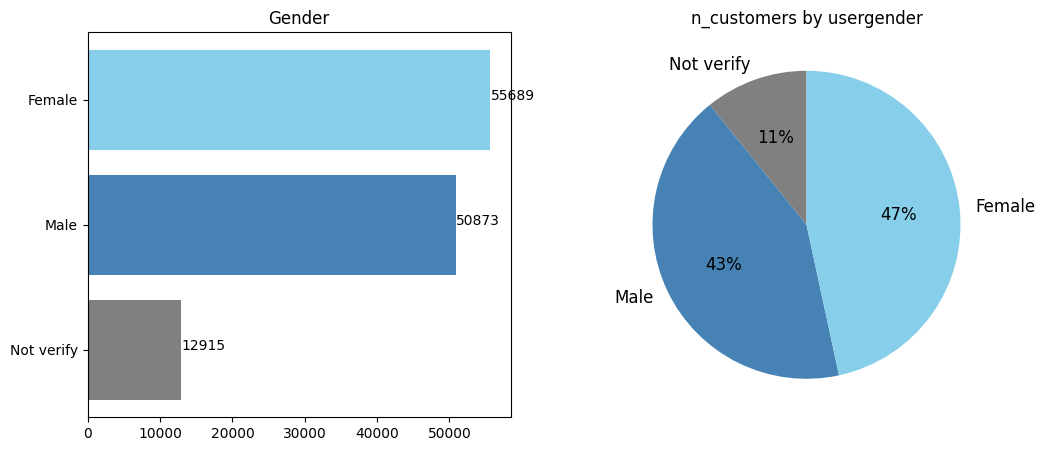

In [ ]:
# Visualize

plt.figure(figsize=(12,5))

ax1 = plt.subplot(1,2,1)
plt.barh(
    df_gender['usergender'],
    df_gender['n_customer'],
    color= df_gender['usergender'].replace({
        'Male': 'steelblue',
        'Female': 'skyblue',
        'Not verify': 'gray'
    })
)
plt.title('Gender')

for index, value in enumerate(df_gender['n_customer']):
    plt.text(value, index, str(value))

ax2 = plt.subplot(1,2,2)
plt.pie(df_gender['n_customer']
        , labels=df_gender['usergender']
        , autopct='%1.0f%%'
        , colors= df_gender['usergender'].replace({
              'Male': 'steelblue',
              'Female': 'skyblue',
              'Not verify': 'gray'
          })
        , textprops={'fontsize': 12}
        , startangle= 90
        )
plt.title('n_customers by usergender')

plt.show()

**Nhận xét**: Nam nữ khá ngang bằng nhau
> - Tuy nhiên, có 10% khách hàng không xác nhận được

### Age Distribution

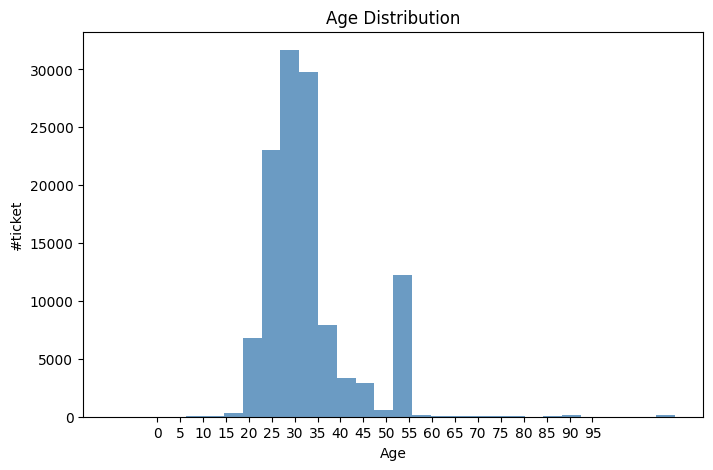

In [ ]:
# Phân phối tổng của KH
df_cus['age'].hist(
    figsize=(8,5)
    , bins = 30
    , color = 'steelblue'
    , grid = False
    , alpha = 0.8
    )
x_values = [i for i in range(0, 100, 5)]
plt.xticks(x_values)
plt.xlabel('Age')
plt.ylabel('#ticket')
plt.title('Age Distribution')
plt.show()


**Nhận xét**: Khách hàng đa số tập trung ở từ 25 - 35 tuổi
> Tuy nhiên: Lại có nhóm khác hàng cao đột ngột từ 50-55, nhóm khách hàng này quá lớn tuổi để đi xem phim cao như vậy.

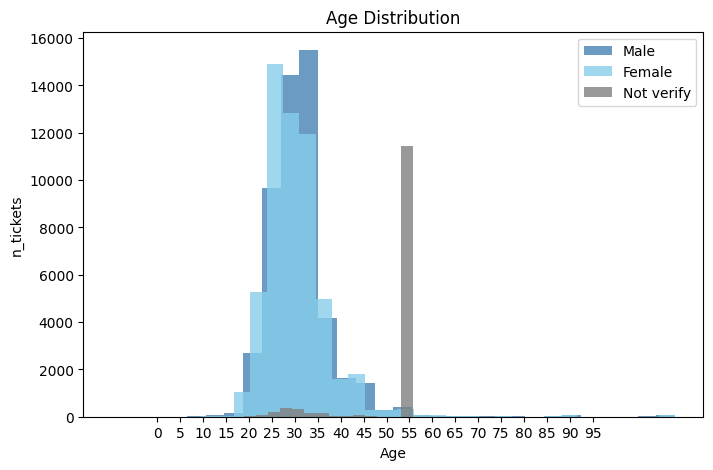

In [ ]:
# Phân phối theo giới tính
plt.figure(figsize=(8,5))
df_cus[df_cus['usergender'] == 'Male']['age'].hist(
    figsize=(8,5)
    , bins = 30
    , color = 'steelblue'
    , grid = False
    , alpha = 0.8
    , label = 'Male'
    )
df_cus[df_cus['usergender'] == 'Female']['age'].hist(
    figsize=(8,5)
    , bins = 30
    , color = 'skyblue'
    , grid = False
    , alpha = 0.8
    , label = 'Female'
    )
df_cus[df_cus['usergender'] == 'Not verify']['age'].hist(
    figsize=(8,5)
    , bins = 30
    , color = 'gray'
    , grid = False
    , alpha = 0.8
    , label = 'Not verify'
    )
x_values = [i for i in range(0, 100, 5)]
plt.xticks(x_values)
plt.xlabel('Age')
plt.ylabel('n_tickets')
plt.title('Age Distribution')
plt.legend()
plt.show()
#

**Nhận xét**: Sau khi dive deeply vào phân bổ theo tuổi, thì thấy nhóm cao đột ngột từ 50 - 55 là nhóm Not verify, hệ thống tự cập nhật tuổi.
> Bonus: Tuổi xem phim của Nữ thì trẻ hơn Nam 1 xíu

In [ ]:
# Xác đinh generation theo độ tuổi

df_cus['age_generation'] = df_cus['dob'].dt.year
df_cus['age_generation'] = df_cus['age_generation'].apply(lambda x: 'baby boomers' if x < 1965
                                                          else 'Gen X' if x < 1981
                                                          else 'Gen Y' if x < 1997
                                                          else 'Gen Z' if x < 2010
                                                          else 'Gen Alpha')
df_cus.head(2)

,customer_id,dob,usergender,age,age_generation
0,100009,1989-02-25,Male,36,Gen Y
1,100493,1991-06-09,Male,33,Gen Y


### Generation Distribution

In [ ]:
# Thống kê số lượng Kh theo generation

df_generation = df_cus[df_cus['usergender'] != 'Not verify'] \
.groupby('age_generation') \
.agg(
    n_customer = ('customer_id', 'nunique')
).sort_values(by='n_customer', ascending=True).reset_index()

df_generation

,age_generation,n_customer
0,Gen Alpha,125
1,baby boomers,590
2,Gen X,4261
3,Gen Z,38276
4,Gen Y,63310


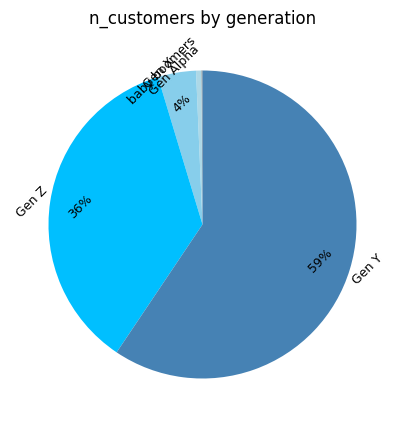

In [ ]:
# Vẽ biểu đồ tròn để xác định phân bổ KH

plt.figure(figsize=(8,5))
plt.pie(df_generation['n_customer']
        , labels=df_generation['age_generation']
        , autopct=lambda p: f'{p:.0f}%' if p > 3 else ''
        , colors= ['gray' ,'lightblue','skyblue','deepskyblue', 'steelblue']
        , textprops={'fontsize': 9, 'rotation': 45}
        , startangle= 90
        , pctdistance=0.8
        , labeldistance=1
        )
plt.title('n_customers by generation')
plt.show()

# Điều chỉnh chữ bị đè lên nhau

plt.show()

### Conclusion 1

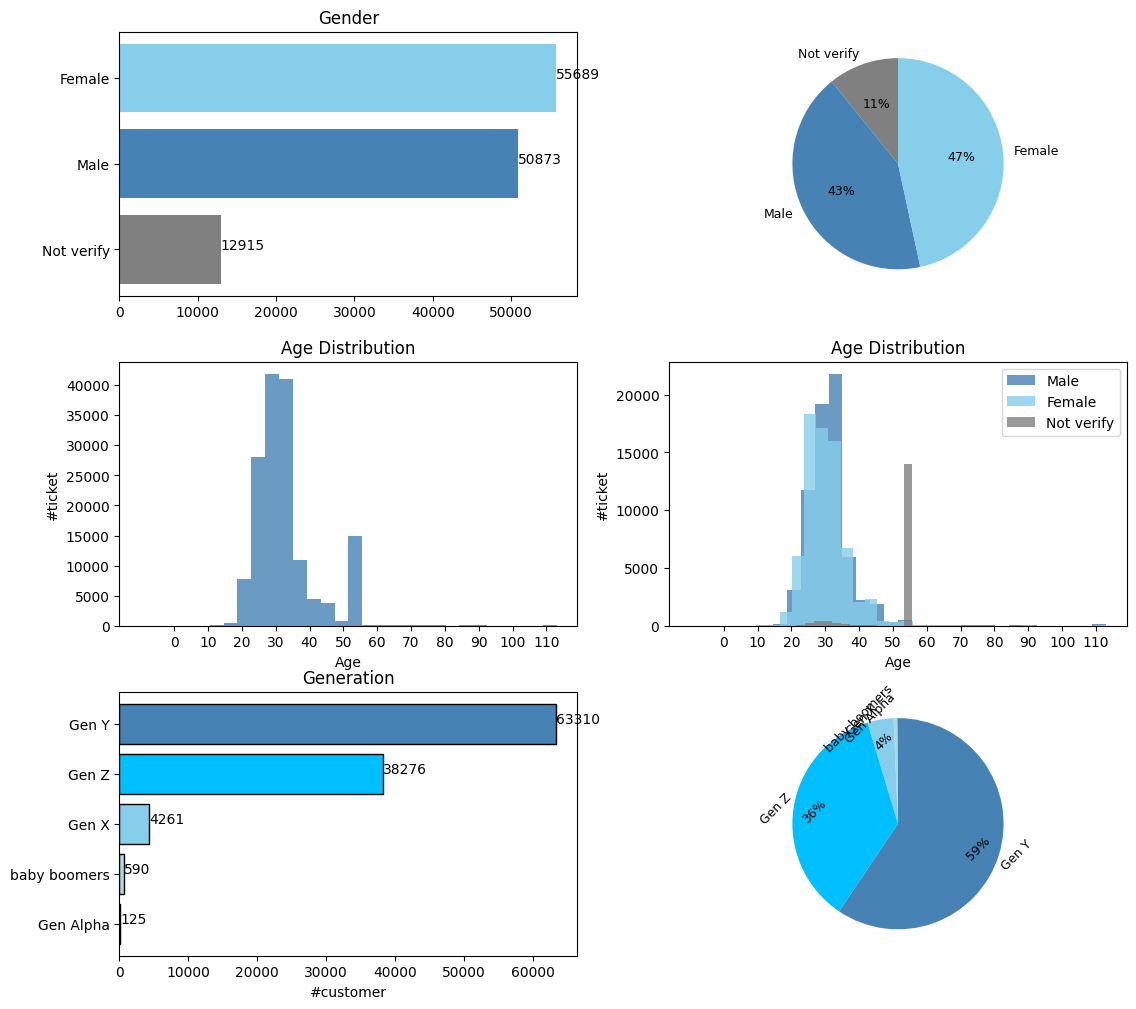

In [ ]:
plt.figure(figsize=(13,12))

# Cột ngang
ax1 = plt.subplot(3,2,1)
plt.barh(
    df_gender['usergender'],
    df_gender['n_customer'],
    color= df_gender['usergender'].replace({
        'Male': 'steelblue',
        'Female': 'skyblue',
        'Not verify': 'gray'
    })
)
plt.title('Gender')
for index, value in enumerate(df_gender['n_customer']):
    plt.text(value, index, str(value))

# Tròn
ax2 = plt.subplot(3,2,2)
plt.pie(df_gender['n_customer']
        , labels=df_gender['usergender']
        , autopct='%1.0f%%'
        , colors= df_gender['usergender'].replace({
              'Male': 'steelblue',
              'Female': 'skyblue',
              'Not verify': 'gray'
          })
        , textprops={'fontsize': 9}
        , startangle= 90
        )

# phân phối tổng
ax3 = plt.subplot(3,2,3)
df['age'].hist(
bins = 30
    , color = 'steelblue'
    , grid = False
    , alpha = 0.8
    )
x_values = [i for i in range(0, max(df['age']), 10)]
plt.xticks(x_values)
plt.xlabel('Age')
plt.ylabel('#ticket')
plt.title('Age Distribution')

# Phân phối theo giới tính
ax4 = plt.subplot(3,2,4)
df[df['usergender'] == 'Male']['age'].hist(
bins = 30
    , color = 'steelblue'
    , grid = False
    , alpha = 0.8
    , label = 'Male'
    )
df[df['usergender'] == 'Female']['age'].hist(
    bins = 30
    , color = 'skyblue'
    , grid = False
    , alpha = 0.8
    , label = 'Female'
    )
df[df['usergender'] == 'Not verify']['age'].hist(
bins = 30
    , color = 'gray'
    , grid = False
    , alpha = 0.8
    , label = 'Not verify'
    )
x_values = [i for i in range(0, max(df['age']), 10)]
plt.xticks(x_values)
plt.xlabel('Age')
plt.ylabel('#ticket')
plt.title('Age Distribution')
plt.legend()

# Phân phối khách hàng theo Generation (cột ngang)
ax5 = plt.subplot(3,2,5)
plt.barh(
    df_generation['age_generation'],
    df_generation['n_customer'],
    color= ['gray' ,'lightblue','skyblue','deepskyblue', 'steelblue'],
    edgecolor='black'
)
for index, value in enumerate(df_generation['n_customer']):
    plt.text(value, index, str(value))
plt.title('Generation')
plt.xlabel('#customer')

# Phân phối khách hàng theo Generation (tròn)
ax6 = plt.subplot(3,2,6)
plt.pie(df_generation['n_customer']
        , labels=df_generation['age_generation']
        , autopct=lambda p: f'{p:.0f}%' if p > 3 else ''
        , colors= ['gray' ,'lightblue','skyblue','deepskyblue', 'steelblue']
        , textprops={'fontsize': 9, 'rotation': 45}
        , startangle= 90
        , pctdistance=0.8
        , labeldistance=1
        )


# Điều chỉnh khoảng cách phù hợp
plt.subplots_adjust(hspace=0.25)
plt.show()

### Bonus #1: Tính phân bổ tuổi KH
1. 18-25
2. 26-35
3. 36-45

In [ ]:
# Tính tỷ trọng KH đặt vé theo độ tuổi
df_customer_verify = (
    df[df['usergender'] != 'Not verify']
)

print(df['customer_id'].nunique()) # Tổng số KH đặt vé

# Số KH đặt vé từ 18-25 tuổi
df_customer_verify_age_18_25 = df_customer_verify[(df_customer_verify['age'] >= 18) & (df_customer_verify['age'] <= 25)]
print(df_customer_verify_age_18_25['customer_id'].nunique()/df['customer_id'].nunique())

# Số KH đặt vé từ 26-35 tuổi
df_customer_verify_age_26_35 = df_customer_verify[(df_customer_verify['age'] >= 26) & (df_customer_verify['age'] <= 35)]
print(df_customer_verify_age_26_35['customer_id'].nunique()/df['customer_id'].nunique())

# Số KH đặt vé từ 36-45 tuổi
df_customer_verify_age_36_45 = df_customer_verify[(df_customer_verify['age'] >= 36) & (df_customer_verify['age'] <= 45)]
print(df_customer_verify_age_36_45['customer_id'].nunique()/df['customer_id'].nunique())

# Số KH đặt vé từ dưới 18 tuổi
df_customer_verify_age_under_18 = df_customer_verify[df_customer_verify['age'] < 18]
print(df_customer_verify_age_under_18['customer_id'].nunique()/df['customer_id'].nunique())

# Số KH đặt vé trên 45 tuổi
df_customer_verify_age_over_45 = df_customer_verify[df_customer_verify['age'] > 45]
print(df_customer_verify_age_over_45['customer_id'].nunique()/df['customer_id'].nunique()) #Bạn này outliner

119477
0.1987579199343807
0.5569691237644065
0.11323518334072667
0.001724181223164291
0.021217472819036298


### Customer Behavior

**Nhận xét**:
> - Số lượng KH Nam và Nữ khá ngang nhau: 44% so với 46%
>> - Tập trung xem phim ở độ tuổi từ 25-35
>> - Nữ có xu hướng xem phim sớm hơn (trẻ hơn Nam)
> - Có đến 10% KH Not verify
> - 10% KH này cũng khiến phân phối xuất hiện outline
> - Khách hàng xem phim chủ yếu là Gen Y (59%) và Gen X (36%)


In [ ]:
df.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,...,movie_name,campaign_type,usergender,dob,model,platform,description,error_group,age_day,age
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,...,Thor: Love And Thunder,direct discount,Male,1989-02-25,"iPhone13,1",mobile,Order successful,none,13163,36
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,...,Thor: Love And Thunder,direct discount,Male,1991-06-09,browser,website,Order successful,none,12329,33


In [ ]:
# Xu hướng xem phim theo thời gian
# 1/. tháng trong năm
# 2/. thứ trong tuần
# 3/. Giờ trong ngày

df['month'] = df['time'].dt.month
df['day_of_week'] = df['time'].dt.day_name()
df['hour'] = df['time'].dt.hour
df['year_month'] = df['time'].dt.strftime('%Y-%m')

df.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,...,model,platform,description,error_group,age_day,age,month,day_of_week,hour,year_month
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,...,"iPhone13,1",mobile,Order successful,none,13163,36,7,Friday,17,2022-07
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,...,browser,website,Order successful,none,12329,33,7,Friday,20,2022-07


In [ ]:
# 1/. tháng trong năm

df_month = df.groupby('year_month').agg(
    n_ticket = ('ticket_id', 'count')
).reset_index()
df_month.head()

,year_month,n_ticket
0,2019-01,2019
1,2019-02,1626
2,2019-03,1004
3,2019-04,4069
4,2019-05,4430


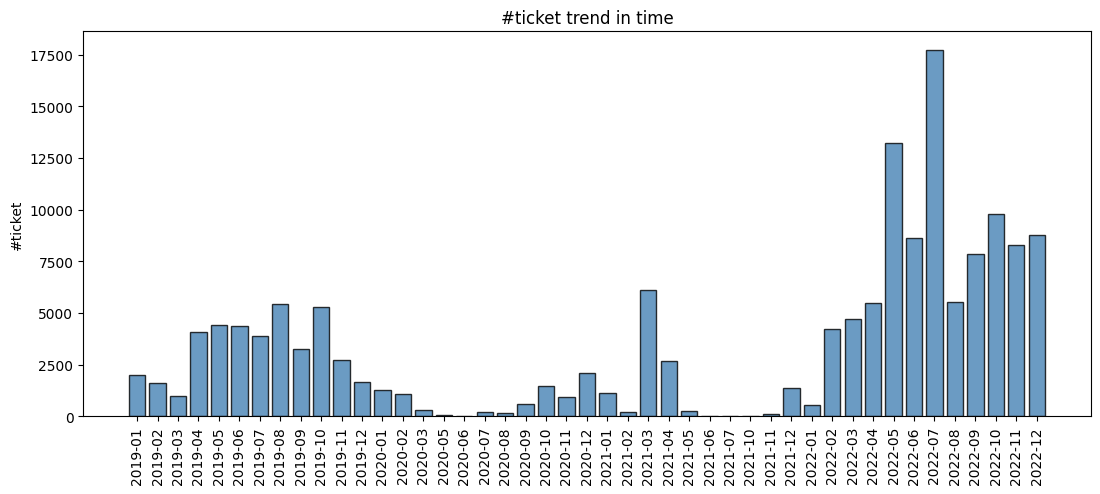

In [ ]:
plt.figure(figsize=(13,5))
plt.bar(df_month['year_month']
        , df_month['n_ticket']
        , color='steelblue'
        , edgecolor='black'
        , alpha = 0.8
        )
plt.title('#ticket trend in time')
plt.ylabel('#ticket')
plt.xticks(rotation = 90)
plt.show()

**Nhận xét**: Nhận thấy thời gian bị khuyết 2020-04, 2021-08, 2021-09

In [ ]:
# Tạo bảng dimension thời gian:

# Xác định khoảng thời gian
start_date = '2019-01-01'
end_date = '2022-12-31'

# Tạo ra range thời gian từ 2 mốc start và end
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Lấy ra list phần tử thời gian tương ứng:
list_month = date_range.month
list_month_name = date_range.strftime('%B')
list_year = date_range.year
list_year_month = date_range.strftime('%Y-%m')

# # Khởi tạo dataframe
dim_time = pd.DataFrame({
    'month_number': list_month,
    'month_name': list_month_name,
    'year': list_year,
    'year_month': list_year_month
})
dim_time.head(2)

,month_number,month_name,year,year_month
0,1,January,2019,2019-01
1,2,February,2019,2019-02


In [ ]:
# Khắc phục dữ liệu thời gian bị khuyết
df_month_dim = df_month.merge(dim_time, on='year_month', how='right')

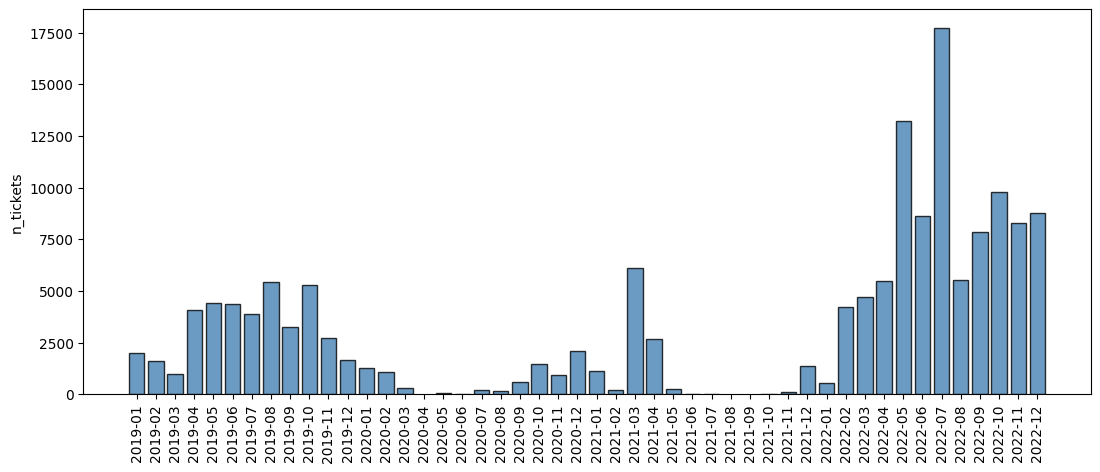

In [ ]:
df_month_dim.replace(0, np.nan, inplace= True)
plt.figure(figsize=(13,5))
plt.bar(df_month_dim['year_month']
        , df_month_dim['n_ticket']
        , color='steelblue'
        , edgecolor='black'
        , alpha = 0.8
        )
plt.ylabel('n_tickets')
plt.xticks(rotation = 90)
plt.show()

### Bonus #2: Tại sao tháng 5, va 7.2022 tăng đột ngột cao.
Bình thường hay có nguyên nhân

In [ ]:
df['promotion'] = df['campaign_type'].apply(lambda x: 'non_promotion' if x == 'non_promotion' else 'promotion')

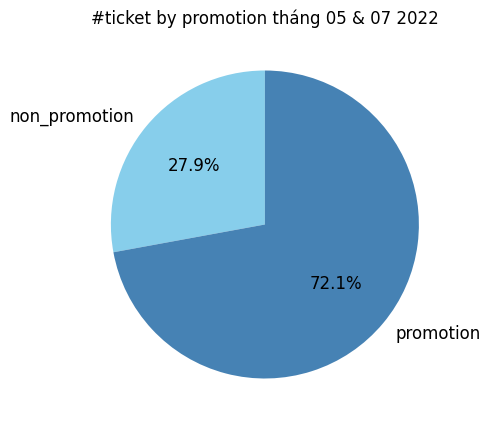

In [ ]:
# Check lý do 1: Do chương trình promotion

df_2022_05_and_07 = df[(df['year_month'] == '2022-05') | (df['year_month'] == '2022-07')]

df_2022_05_and_07_pie = df_2022_05_and_07.groupby('promotion').agg(
    n_ticket = ('ticket_id', 'count')
).reset_index()

plt.figure(figsize=(8,5))
plt.pie(df_2022_05_and_07_pie['n_ticket']
        , labels=df_2022_05_and_07_pie['promotion']
        , autopct='%1.1f%%'
        , colors= df_2022_05_and_07_pie['promotion'].replace({
              'promotion': 'steelblue',
              'non_promotion': 'skyblue'
          })
        , textprops={'fontsize': 12}
        , startangle= 90
       )
plt.title('#ticket by promotion tháng 05 & 07 2022')
plt.show()

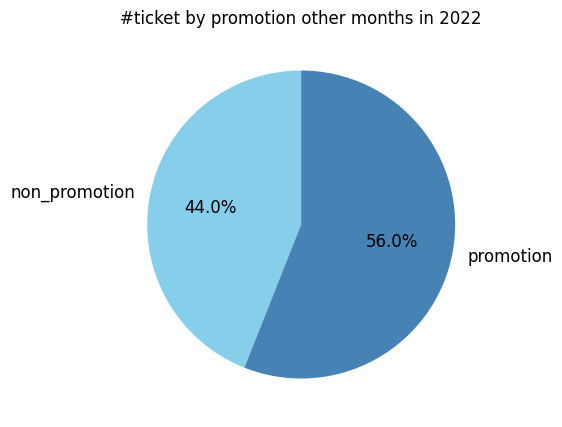

In [ ]:
df_2022_non_05_and_07 = df[(df['year_month'] != '2022-05') & (df['year_month'] != '2022-07')]

df_2022_non_05_and_07_pie = df_2022_non_05_and_07.groupby('promotion').agg(
    n_ticket = ('ticket_id', 'count')
).reset_index()

plt.figure(figsize=(8,5))
plt.pie(df_2022_non_05_and_07_pie['n_ticket']
        , labels=df_2022_non_05_and_07_pie['promotion']
        , autopct='%1.1f%%'
        , colors= df_2022_non_05_and_07_pie['promotion'].replace({
              'promotion': 'steelblue',
              'non_promotion': 'skyblue'
          })
        , textprops={'fontsize': 12}
        , startangle= 90
       )
plt.title('#ticket by promotion other months in 2022')
plt.show()

In [ ]:
df_2022_non_05_and_07_pie

,promotion,n_ticket
0,non_promotion,54496
1,promotion,69374


In [ ]:
df_2022_05_and_07_pie

,promotion,n_ticket
0,non_promotion,8633
1,promotion,22324


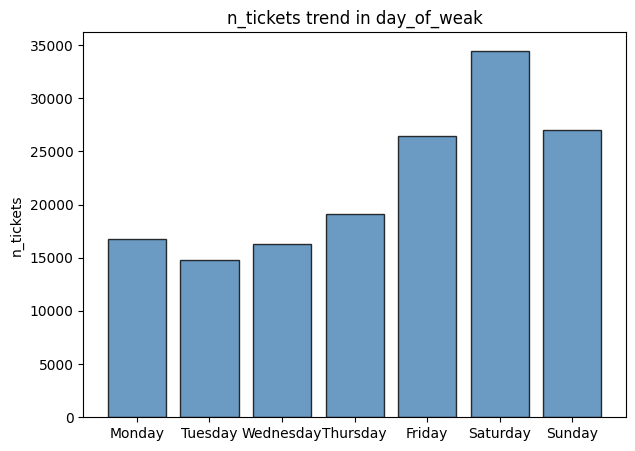

In [ ]:
# 2/. thứ trong tuần
df['day_of_week_number'] = df['time'].dt.dayofweek

df_dayname = df.groupby(['day_of_week_number', 'day_of_week']).agg(
    n_ticket = ('ticket_id', 'count')
).reset_index()

plt.figure(figsize=(7,5))
plt.bar(df_dayname['day_of_week']
        , df_dayname['n_ticket']
        , color='steelblue'
        , edgecolor='black'
        , alpha = 0.8
        )
plt.title('n_tickets trend in day_of_weak')
plt.ylabel('n_tickets')
plt.show()

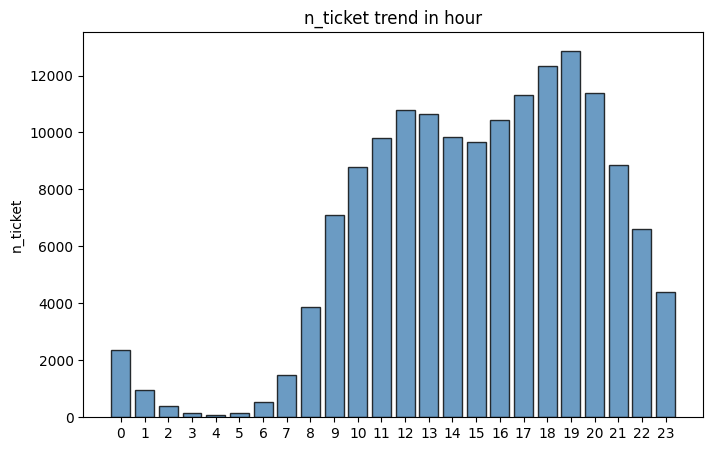

In [ ]:
# 3/. Giờ trong ngày

df_hour = df.groupby('hour').agg(
    n_ticket = ('ticket_id', 'count')
).reset_index()

plt.figure(figsize=(8,5))
plt.bar(df_hour['hour']
        , df_hour['n_ticket']
        , color='steelblue'
        , edgecolor='black'
        , alpha = 0.8
        )
x_values = [i for i in range(0, 24, 1)]
plt.xticks(x_values)
plt.title('n_ticket trend in hour')
plt.ylabel('n_ticket')
plt.show()

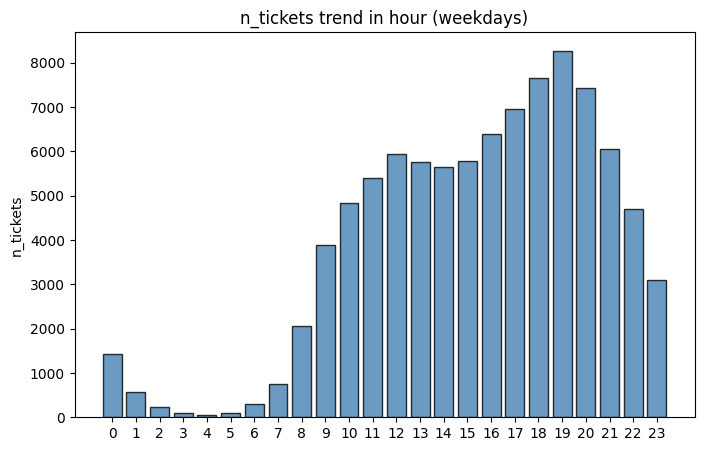

In [ ]:
weekdays_list = list(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
weekend_list = list(['Saturday', 'Sunday'])

df_hour = df[df['day_of_week'].isin(weekdays_list)].groupby('hour').agg(
    n_ticket = ('ticket_id', 'count')
).reset_index()

plt.figure(figsize=(8,5))
plt.bar(df_hour['hour']
        , df_hour['n_ticket']
        , color='steelblue'
        , edgecolor='black'
        , alpha = 0.8
        )
x_values = [i for i in range(0, 24, 1)]
plt.xticks(x_values)
plt.title('n_tickets trend in hour (weekdays)')
plt.ylabel('n_tickets')
plt.show()

### Conclusion 2

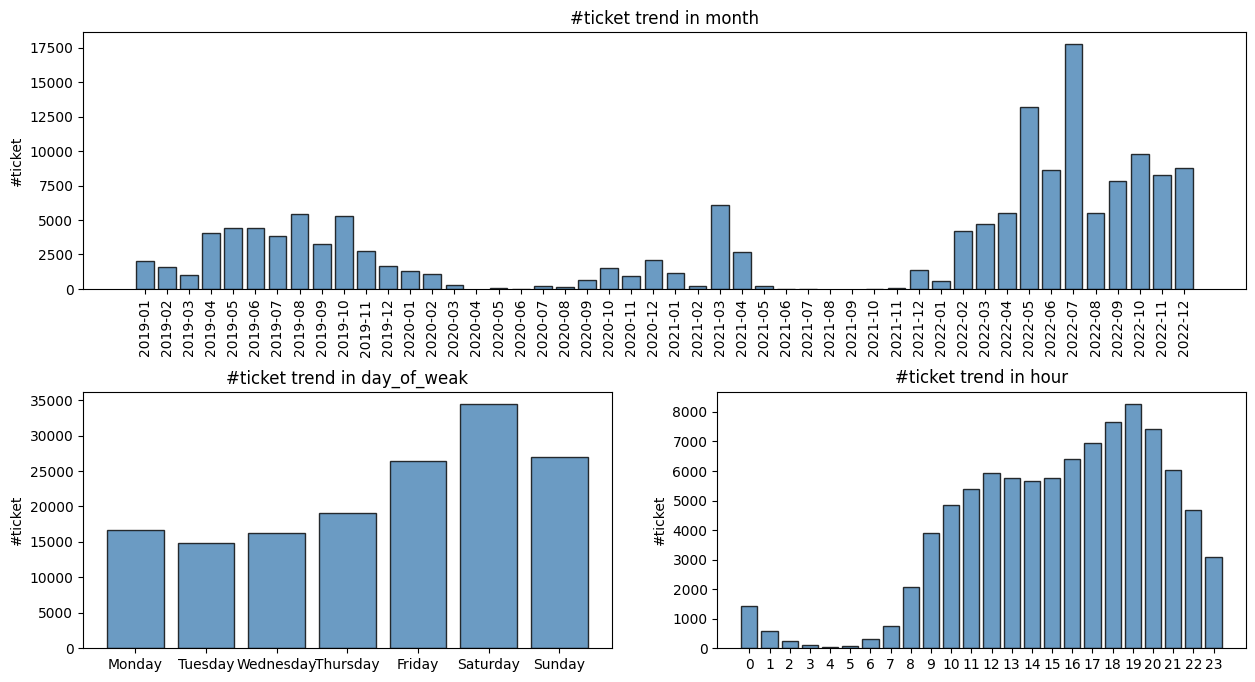

In [ ]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot(2,1,1)
plt.bar(df_month_dim['year_month']
        , df_month_dim['n_ticket']
        , color='steelblue'
        , edgecolor='black'
        , alpha = 0.8
        )
plt.title('#ticket trend in month')
plt.ylabel('#ticket')
plt.xticks(rotation = 90)

ax2 = plt.subplot(2,2,3)
plt.bar(df_dayname['day_of_week']
        , df_dayname['n_ticket']
        , color='steelblue'
        , edgecolor='black'
        , alpha = 0.8
        )
plt.title('#ticket trend in day_of_weak')
plt.ylabel('#ticket')

ax3 = plt.subplot(2,2,4)
plt.bar(df_hour['hour']
        , df_hour['n_ticket']
        , color='steelblue'
        , edgecolor='black'
        , alpha = 0.8
        )
x_values = [i for i in range(0, 24, 1)]
plt.xticks(x_values)
plt.title('#ticket trend in hour')
plt.ylabel('#ticket')

plt.subplots_adjust(hspace=0.4)
plt.show()

**Nhận xét**:
- 1. Khách hàng xem phim nhiều vào ngày cuối tuần (common sense)
- 2. Giờ xem phim tập trung từ 9h00 - 21h00. Cao điểm ở 17h00 - 20h00.
- 3. Giai đoạn 2019 - 2021, ảnh hưởng từ đại dịch Covid19. Các rạp xem phim giảm năng suất và có giai đoạn phải đóng cửa.
- 4. Năm 2022 phục hồi từ đại dịch.

## Customer Factors

### Platforms

In [ ]:
df.platform.unique()

array(['mobile', 'website', 'unknown'], dtype=object)

In [ ]:
df_platform = df[df['platform'] != 'unknown'].groupby('platform').agg(
    total_ticket = ('ticket_id', 'nunique')
).reset_index().sort_values(by='total_ticket', ascending=False)

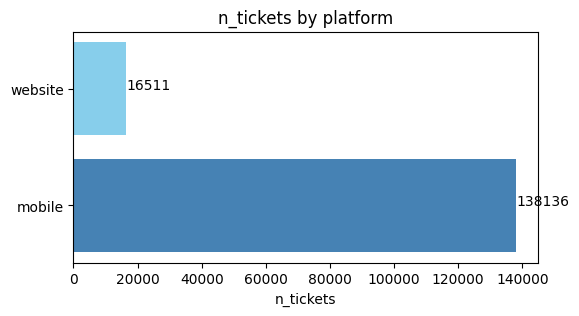

In [ ]:
# Biểu đồ barh

plt.figure(figsize = (6,3))
plt.barh(df_platform['platform']
         , df_platform['total_ticket']
         , color=df_platform['platform'].replace({
             'website': 'skyblue',
             'mobile': 'steelblue'
         })
         ,
)
plt.title('n_tickets by platform')
for index, value in enumerate(df_platform['total_ticket']):
    plt.text(value, index, str(value))
plt.xlabel('n_tickets')
plt.show()

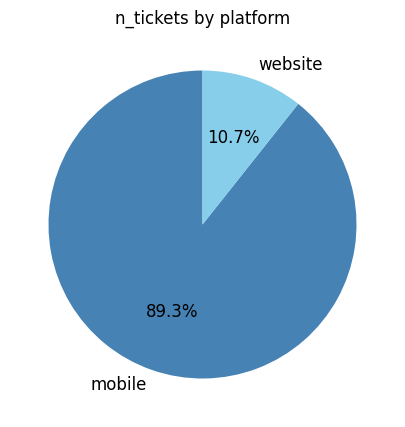

In [ ]:
# Biểu đồ tròn

plt.figure(figsize = (8,5))
plt.pie(df_platform['total_ticket']
        , labels=df_platform['platform']
        , autopct='%1.1f%%'
        , colors= df_platform['platform'].replace({
              'website': 'skyblue',
              'mobile': 'steelblue'
          })
        , textprops={'fontsize': 12}
        , startangle= 90
       )
plt.title('n_tickets by platform')
plt.show()

In [ ]:
# Xu hướng sử dụng Platform để đặt vé

df_platform_month = df[df['platform'] != 'unknown'].groupby([ 'platform','year_month']).agg(
    n_ticket = ('ticket_id', 'nunique')
).sort_values(by='year_month').reset_index()

df_platform_month_web = df_platform_month[df_platform_month['platform'] == 'website']
df_platform_month_mobile = df_platform_month[df_platform_month['platform'] == 'mobile']

df_platform_month_web_dim = df_platform_month_web.merge(dim_time, on='year_month', how='right')
df_platform_month_mobile_dim = df_platform_month_mobile.merge(dim_time, on='year_month', how='right')

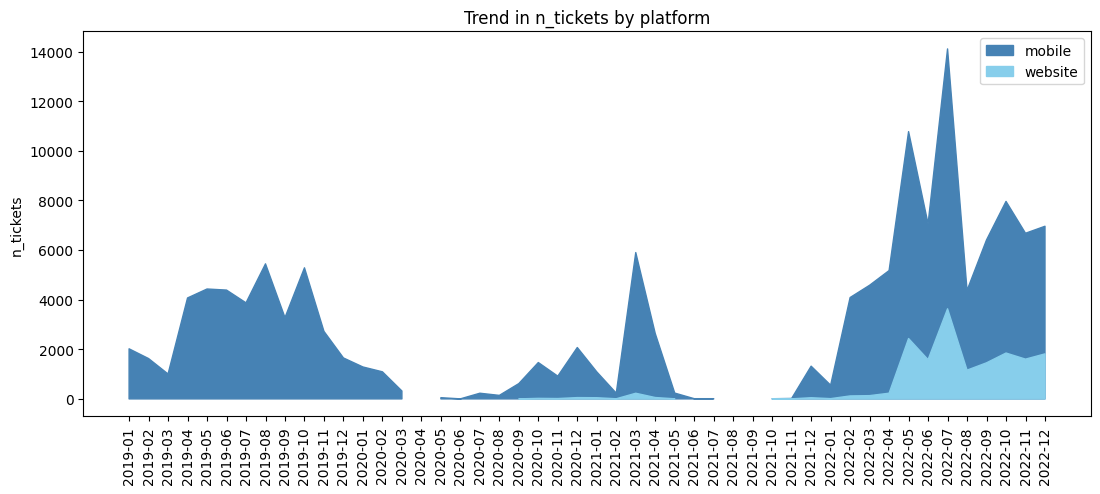

In [ ]:
plt.figure(figsize=(13,5))

plt.fill_between(df_platform_month_mobile_dim['year_month']
         , df_platform_month_mobile_dim['n_ticket']
         , label='mobile'
         , color='steelblue')
plt.fill_between(df_platform_month_web_dim['year_month']
         , df_platform_month_web_dim['n_ticket']
         , label='website'
         , color='skyblue')
plt.xticks(rotation = 90)

plt.title('n_tickets by platform')
plt.ylabel('n_tickets')
plt.legend()
plt.show()

**Nhận xét**:
- Mua vé bằng mobile vẫn là nền tảng mua chính.
- Từ năm 2022 phát triển thên nền tảng website.

### Model

In [ ]:
# Phân loại Model thành  iOS, Samsung, Android

df['model'].unique()

array(['iPhone13,1', 'browser', 'unknown', ..., 'Samsung SM-J727S',
       'Zuk Z1', 'Samsung SM-N9750'], dtype=object)

In [ ]:
# Group các device model
df['OS Version'] = df['model'].apply(lambda x: 'iOS' if 'iPhone' in x or 'iPod' in x  or 'iPad' in x
                                     else 'browser' if x == 'browser'
                                     else 'unknown' if x == 'unknown' or x == 'devicemodel'
                                     else 'android & others'
                                     )
df['OS Version'].unique()

array(['iOS', 'browser', 'unknown', 'android & others'], dtype=object)

In [ ]:
df_model = df.groupby('OS Version').agg(
    n_ticket = ('ticket_id', 'nunique')
).sort_values(by='n_ticket').reset_index()
df_model

,OS Version,n_ticket
0,browser,13377
1,android & others,20934
2,iOS,51560
3,unknown,68854


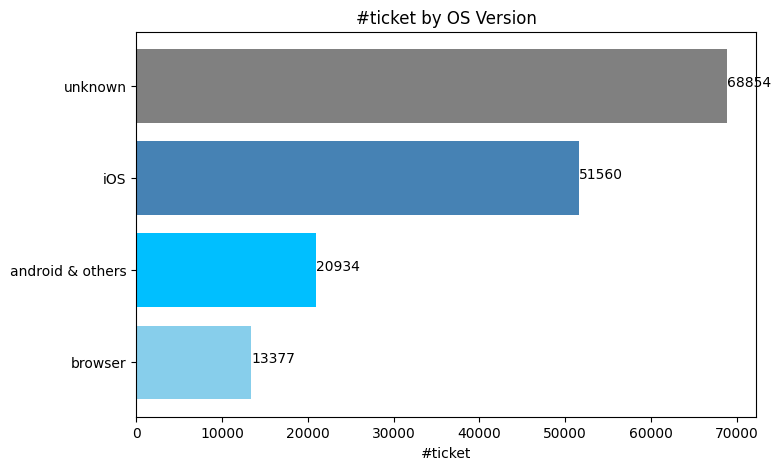

In [ ]:
# Visualization by Bar chart

plt.figure(figsize = (8,5))
plt.barh(df_model['OS Version']
         , df_model['n_ticket']
         , color=df_model['OS Version'].replace({
             'iOS': 'steelblue',
             'browser': 'skyblue',
             'unknown': 'gray',
             'android & others': 'deepskyblue'
         })

)
plt.title('#ticket by OS Version')
for index, value in enumerate(df_model['n_ticket']):
    plt.text(value, index, str(value))
plt.xlabel('#ticket')
plt.show()

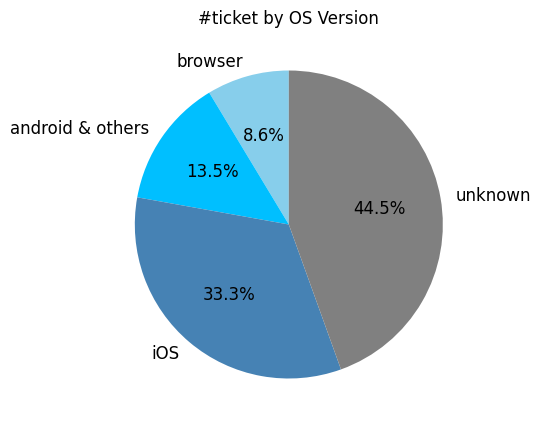

In [ ]:
# Visualization by Pie Chart

plt.figure(figsize = (8,5))
plt.pie(df_model['n_ticket']
        , labels=df_model['OS Version']
        , autopct='%1.1f%%'
        , colors= df_model['OS Version'].replace({
              'iOS': 'steelblue',
              'browser': 'skyblue',
              'unknown': 'gray',
              'android & others': 'deepskyblue'
          })
        , textprops={'fontsize': 12}
        , startangle= 90
)
plt.title('#ticket by OS Version')
plt.show()

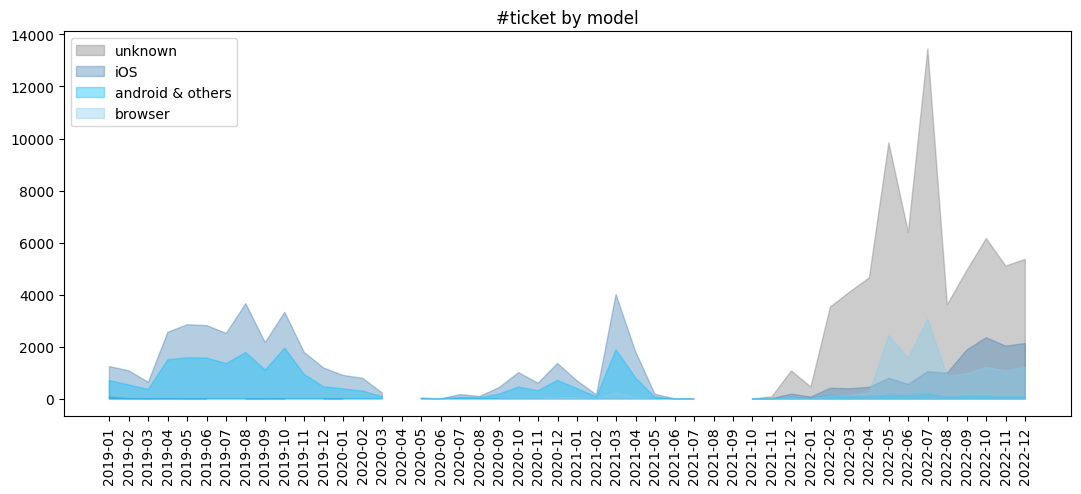

In [ ]:
# Visualization by Area Chart

df_model_month = df.groupby(['OS Version','year_month']).agg(
    n_ticket = ('ticket_id', 'nunique')
).sort_values(by='year_month').reset_index()

version_color = [{
    'unknown': 'gray',
    'iOS': 'steelblue',
    'android & others': 'deepskyblue',
    'browser': 'skyblue'
}]

plt.figure(figsize=(13,5))
for version, color in version_color[0].items():
  df_model_area = df_model_month[df_model_month['OS Version'] == version]
  df_model_area_dim = df_model_area.merge(dim_time, on='year_month', how='right')
  plt.fill_between(df_model_area_dim['year_month']
         , df_model_area_dim['n_ticket']
         , label=version
         , color=color
          , alpha = 0.4
        )

plt.xticks(rotation = 90)

plt.title('#ticket by model')

plt.legend()
plt.show()

**Nhận xét**:
- unknown đột ngột tăng mạnh ở 2022 --> Tăng chất lượng công nghệ theo dõi
- Mua vé bằng trình duyệt website bắt đầu phát triển từ 2022, trước đó không có
> **Action**: Cần tìm lý do tại sao unknown lớn như vậy

### **Movie**

In [ ]:
df_movie = df[df['status_id'] == 1] \
.groupby('movie_name').agg(
    n_ticket_success = ('ticket_id', 'count')
).reset_index()

# tạo list các movie được đặt thành công và có trên 1000 lượt xem
list_upper1000_movie = list(df_movie[df_movie['n_ticket_success'] > 1000]['movie_name'].unique())

# Tạo bảng pivottable movie theo thời gian để vẽ xu hướng xem các phim theo thời gian
df_movie_time_pivot = df[(df['status_id'] == 1) & (df['movie_name'].isin(list_upper1000_movie))] \
.pivot_table(
    index='year_month',
    columns='movie_name',
    values='ticket_id',
    aggfunc='count')
df_movie_time_pivot.head(10)

movie_name,Avatar: The Way Of Water,Avengers: Endgame,Batman,Black Adam,Black Panther 2: Wakanda Forever,Blood Moon Party,Confidential Assignment 2: International,Dad I'm Sorry,Detective Conan: The Bride Of Halloween,Doctor Strange In The Multiverse Of Madness,...,Morbius,Naked Truth,One Piece Film: Red,Parasite,Peninsula,Spider-Man Far From Home,Spider-Man: No Way Home,Thor: Love And Thunder,Top Gun: Maverick,You And Trinh
year_month,,,,,,,,,,,,,,,,,,,,,
2019-04,NaN,2081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05,NaN,1130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,751.0,NaN,28.0,NaN,NaN,NaN,NaN
2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,286.0,NaN,1125.0,NaN,NaN,NaN,NaN
2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list_upper1000_movie

['Avatar: The Way Of Water',
 'Avengers: Endgame',
 'Batman',
 'Black Adam',
 'Black Panther 2: Wakanda Forever',
 'Blood Moon Party',
 'Confidential Assignment 2: International',
 "Dad I'm Sorry",
 'Detective Conan: The Bride Of Halloween',
 'Doctor Strange In The Multiverse Of Madness',
 "Doraemon: Nobita's Little Star Wars 2021",
 'Emergency Declaration',
 'Extremely Easy Job',
 'Face Off: 48h',
 'Fantastic Beasts: Secrets Of Dumbledore',
 'Fast & Furious Presents: Hobbs & Shaw',
 'Godzilla Vs. Kong',
 'Joker',
 'Jurassic World Dominion',
 'Love Destiny',
 'Maleficent',
 'Minions: The Rise Of Gru',
 'Morbius',
 'Naked Truth',
 'One Piece Film: Red',
 'Parasite',
 'Peninsula',
 'Spider-Man Far From Home',
 'Spider-Man: No Way Home',
 'Thor: Love And Thunder',
 'Top Gun: Maverick',
 'You And Trinh']

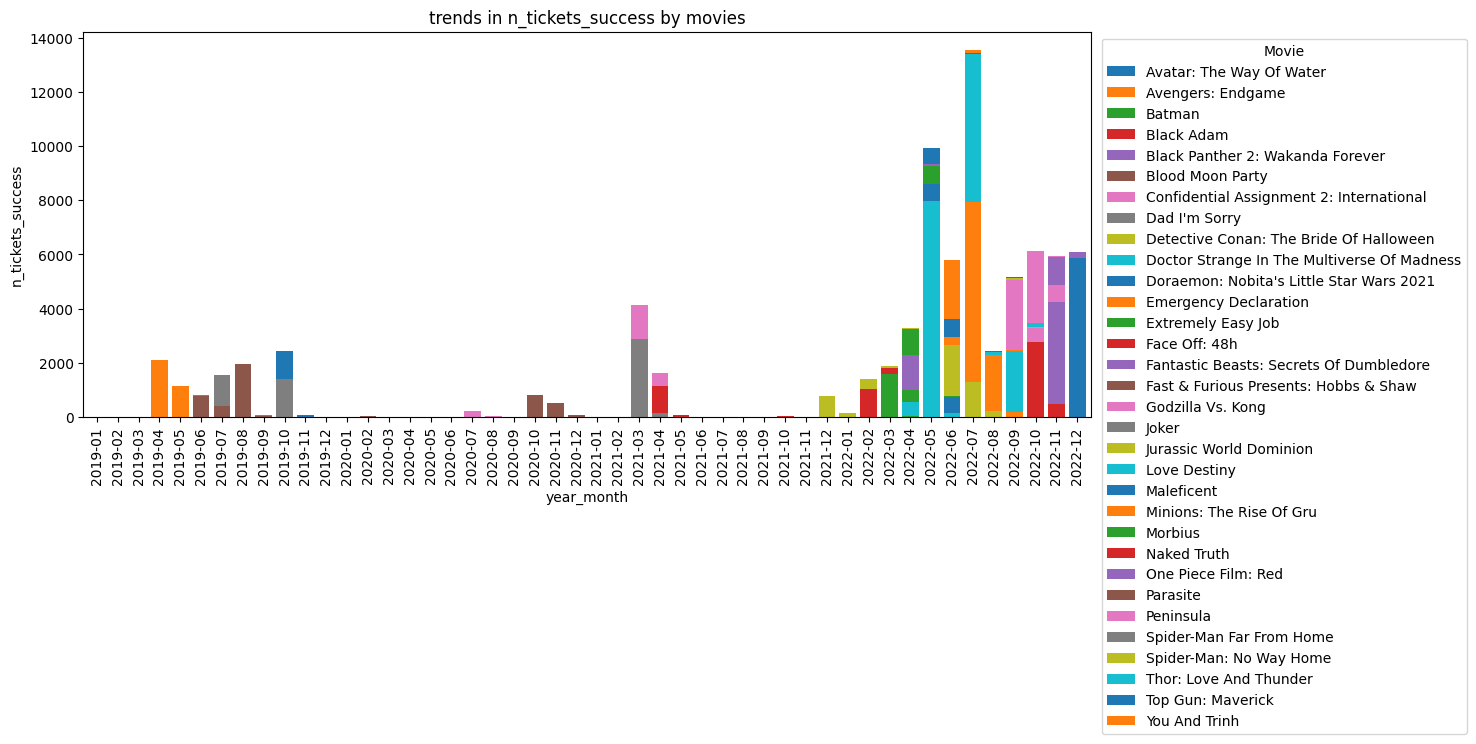

In [145]:
df_movie_pivot_dim = df_movie_time_pivot.merge(dim_time, on='year_month', how='right').drop(columns=['month_number','month_name',	'year'])
ax = df_movie_pivot_dim.plot(
    x = 'year_month'
    , kind ='bar'
    , stacked = True
    , figsize=(13,5)
    , width=0.8
)
plt.legend(title='Movie', loc ='upper right', bbox_to_anchor=(1.38,1))
plt.title('trends in n_tickets_success by movies')
plt.ylabel('n_tickets_success')
plt.xticks(rotation = 90)
plt.show()

**Nhận xét**: Không có xu hướng xem phim nào đặt biệt. Phim nào hot trend tại từng thời điểm sẽ được xem nhiều.
> **Action:** Tập trung chiếu các phim hot trend sẽ mang lại hiệu quả lớn

### Ticket_Price

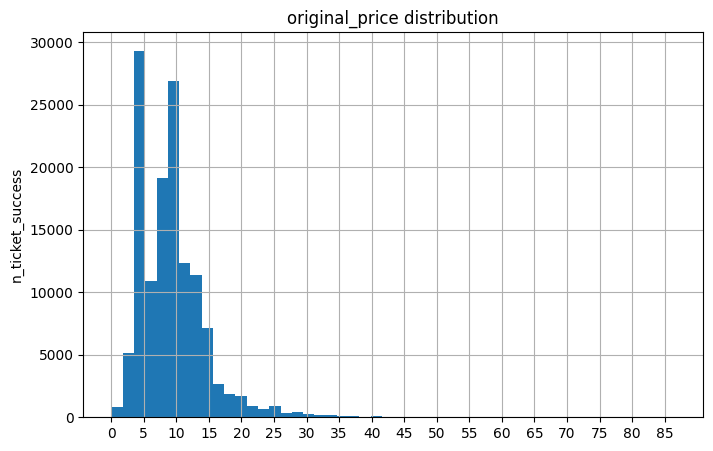

In [ ]:
df_price = df[df['status_id'] == 1]

df_price['original_price'].hist(bins = 50
                                , figsize=(8,5))
x_values = [i for i in range(0, int(max(df_price['original_price'])) + 1, 5)]
plt.xticks(x_values)
plt.ylabel('n_ticket_success')
plt.title('original_price distribution')
plt.show()

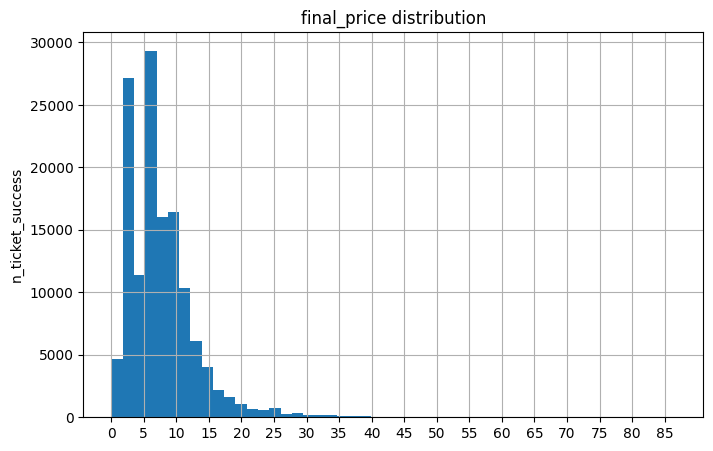

In [ ]:
df_price['final_price'].hist(bins = 50
                                , figsize=(8,5))
x_values = [i for i in range(0, int(max(df_price['final_price'])) + 1, 5)]
plt.xticks(x_values)
plt.ylabel('n_ticket_success')
plt.title('final_price distribution')
plt.show()

**Nhận xét:** Giá vé tập trung mua từ 4 - $15

### Promotion

In [ ]:
# Tạo cột phân loại promotion & non_promotion
df['promotion'] = df['campaign_type'].apply(lambda x: 'non_promotion' if x == 'non_promotion' else 'promotion')

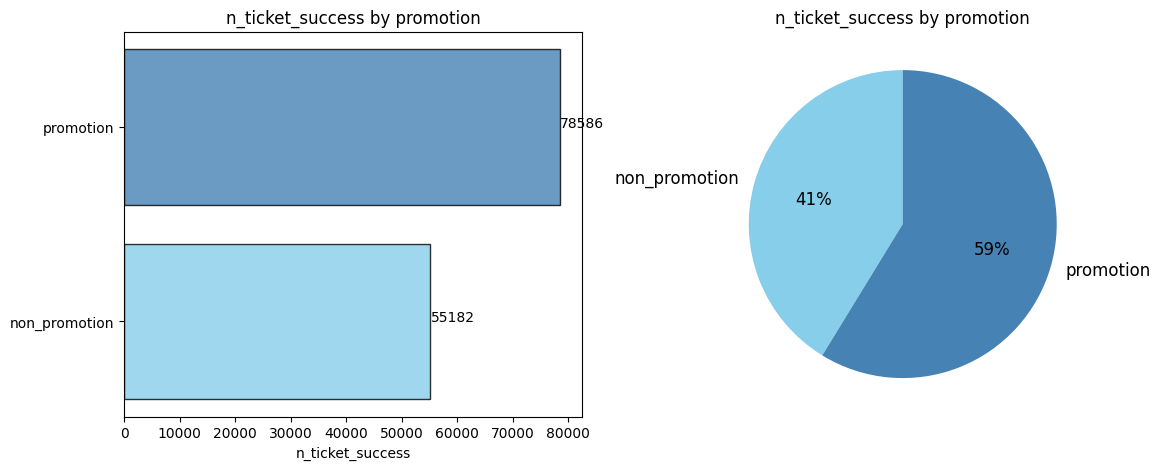

In [ ]:
# Phân tích tỷ trọng promotion và xu hướng

# 1/. Tỷ trọng promotion
df_promotion = (
    df[df['status_id'] == 1]
    .groupby('promotion')
    .agg(
        n_ticket_success = ('ticket_id', 'count')
    )
    .reset_index()
)

plt.figure(figsize=(13,5))

ax1 = plt.subplot(1,2,1)
plt.barh(df_promotion['promotion']
        , df_promotion['n_ticket_success']
        , color=df_promotion['promotion'].replace({
              'promotion': 'steelblue',
              'non_promotion': 'skyblue'
          })
        , edgecolor='black'
        , alpha = 0.8
        )
for index, value in enumerate(df_promotion['n_ticket_success']):
    plt.text(value, index, str(value))
plt.title('n_ticket_success by promotion')
plt.xlabel('n_ticket_success')


ax2 = plt.subplot(1,2,2)
plt.pie(df_promotion['n_ticket_success']
        , labels=df_promotion['promotion']
        , autopct='%1.0f%%'
        , colors= df_promotion['promotion'].replace({
              'promotion': 'steelblue',
              'non_promotion': 'skyblue'
          })
        , startangle= 90
        , textprops={'fontsize': 12}
)
plt.title('n_ticket_success by promotion')

plt.show()

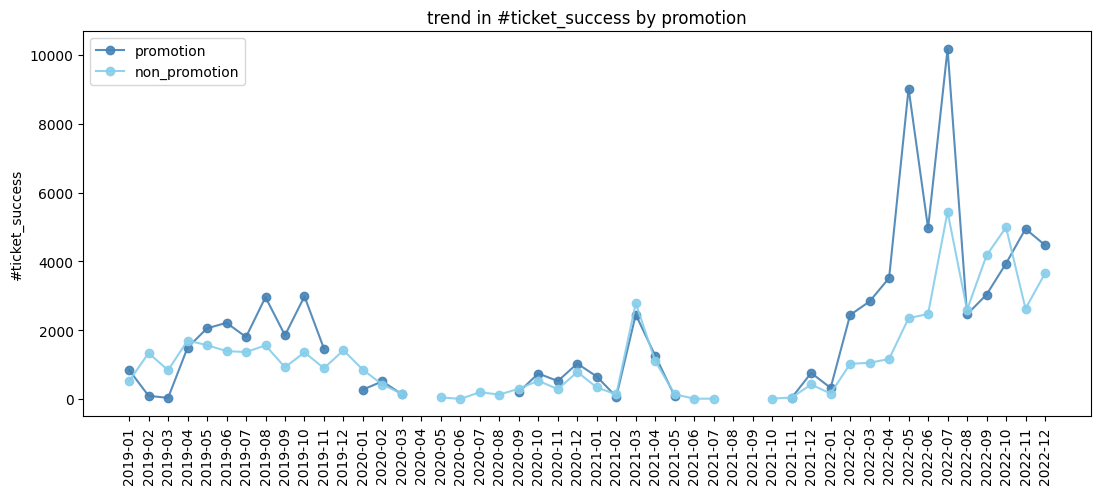

In [ ]:
# Phân tích tỷ trọng promotion và xu hướng

# 2/. Tỷ trọng xu hướng promotion và non_promotion
df_promotion_month = df[df['status_id'] == 1] \
.groupby(['promotion','year_month']).agg(
    n_ticket_success = ('ticket_id', 'count')
).sort_values(by='year_month').reset_index()

promotion_color = [{
    'promotion': 'steelblue',
    'non_promotion': 'skyblue'
}]

plt.figure(figsize=(13,5))
for promotion, color in promotion_color[0].items():
  df_promotion_month_area = df_promotion_month[df_promotion_month['promotion'] == promotion]
  df_promotion_month_area_dim = df_promotion_month_area.merge(dim_time, on='year_month', how='right')
  plt.plot(df_promotion_month_area_dim['year_month']
         , df_promotion_month_area_dim['n_ticket_success']
         , label=promotion
         , color=color
         , alpha = 0.9
         , marker = 'o')
plt.xticks(rotation = 90)
plt.title('trend in #ticket_success by promotion')
plt.ylabel('#ticket_success')

plt.legend()
plt.show()

**Nhận xét:**
- KH đến từ phần lớn hoạt động Promotion 60% trong 4 năm (từ 2019 - 2022)
- Nhưng, phần % này lớn là do vào năm 2022 hoạt động promotion từ xúc tiến mạnh
> **Why (giả thuyết):** Sau giai đoạn Covid_19, hoạt động promotion được triển khai để thu hút khách hàng.
- **Question:** Hoạt động nào được KH ưa chuộng nhất??

In [ ]:
# **Question:** Hoạt động nào được KH ưa chuộng nhất??
# 1/. So sánh theo cường độ tỷ trọng
# 2/. Xu hướng theo thời gian

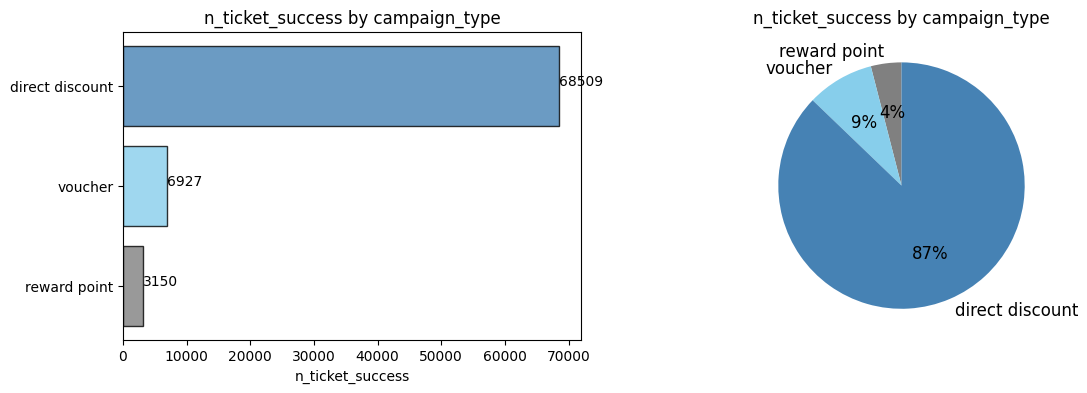

In [ ]:
# 1/. So sánh theo cường độ tỷ trọng
df_promotion_type = (
    df[(df['status_id'] == 1) & (df['promotion'] == 'promotion')]
    .groupby(['campaign_type'])
    .agg(
        n_ticket_success = ('ticket_id', 'count')
    )
    .sort_values(by='n_ticket_success', ascending=True)
    .reset_index()
)

plt.figure(figsize=(13,4))

ax1 = plt.subplot(1,2,1)
plt.barh(df_promotion_type['campaign_type']
         , df_promotion_type['n_ticket_success']
         , color=df_promotion_type['campaign_type'].replace({
             'direct discount': 'steelblue',
             'voucher': 'skyblue',
             'reward point': 'gray'
         })
         , edgecolor='black'
         , alpha = 0.8
)
for index, value in enumerate(df_promotion_type['n_ticket_success']):
    plt.text(value, index, str(value))
plt.title('n_ticket_success by campaign_type')
plt.xlabel('n_ticket_success')


ax2 = plt.subplot(1,2,2)
plt.pie(df_promotion_type['n_ticket_success']
        , labels=df_promotion_type['campaign_type']
        , autopct='%1.0f%%'
        , colors= df_promotion_type['campaign_type'].replace({
              'direct discount': 'steelblue',
              'voucher': 'skyblue',
              'reward point': 'gray'
          })
        , startangle = 90
        , textprops={'fontsize': 12}
)
plt.title('n_ticket_success by campaign_type')


plt.show()

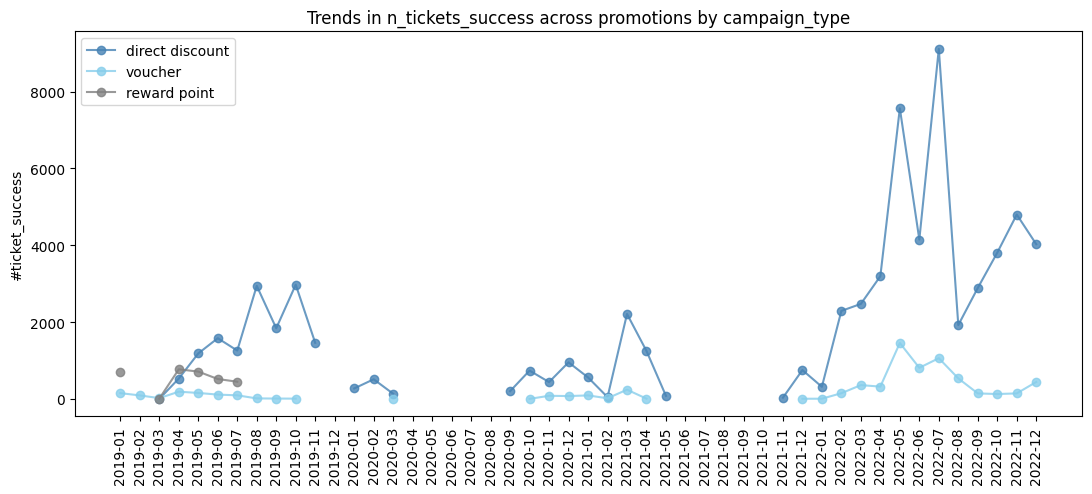

In [ ]:
# 2/. Xu hướng theo thời gian

df_promotion_type_month = (df[(df['status_id'] == 1) & (df['promotion'] == 'promotion')]
                           .groupby(['year_month','campaign_type'])
                           .agg(
                               n_ticket_success = ('ticket_id', 'count')
                           ).sort_values(by='year_month').reset_index()
                           )

promotiontype_color = [{
    'direct discount': 'steelblue',
    'voucher': 'skyblue',
    'reward point': 'gray'
}]

plt.figure(figsize=(13,5))
for promotiontype, color in promotiontype_color[0].items():
  df_promotion_type_month_area = df_promotion_type_month[df_promotion_type_month['campaign_type'] == promotiontype]
  df_promotion_type_month_area_dim = df_promotion_type_month_area.merge(dim_time, on='year_month', how='right')
  plt.plot(df_promotion_type_month_area_dim['year_month']
         , df_promotion_type_month_area_dim['n_ticket_success']
         , label=promotiontype
         , color=color
           , alpha = 0.8
           , marker = 'o')
plt.xticks(rotation = 90)
plt.title('trend in #ticket_success by campaign_type')
plt.ylabel('#ticket_success')

plt.legend()
plt.show()

**Nhận xét:**
- Khách hàng yêu thích chương trình direct discount (87%). Hoạt đọng này luôn chiếm tỷ trọng lớn ở bất kỳ thời gian nào.
- Hoạt động reward point nổi lên ở quý 2 2019 sau đó mất hút
- Hoạt động voucher thì luôn ở mức thấp theo thời gian
> **Action:** Xem xét phát triển hoạt động direct discount tốt hơn để thu hút nhiều khách hàng hơn.

### Paying_Method

In [ ]:
# Những loại phương thức thanh toán mà nền tảng cung cấp

df['paying_method'].unique()

array(['money in app', 'bank account', 'debit card', 'credit card',
       'other'], dtype=object)

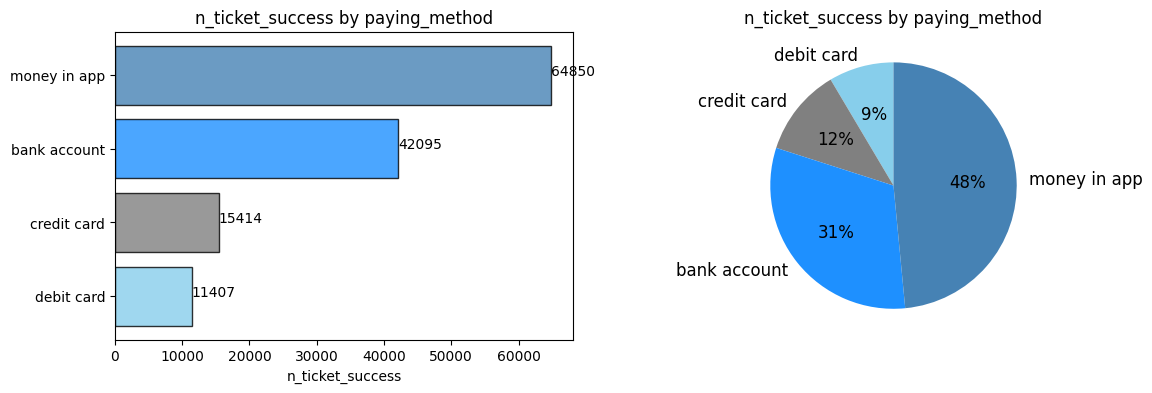

In [ ]:
# Tỷ trọng phương thức thanh toán theo các vé đặt thành công

df_paying_method = (
    df[(df['status_id'] == 1) & (df['paying_method'] != 'other' )] # Lọc bỏ 'others' vì quá nhỏ (chỉ có 2 ticket)
    .groupby('paying_method')
    .agg(
        n_ticket_success = ('ticket_id', 'count')
    )
    .sort_values(by='n_ticket_success', ascending=True)
    .reset_index()
)

plt.figure(figsize=(13,4))

ax1 = plt.subplot(1,2,1)
plt.barh(
    df_paying_method['paying_method']
    , df_paying_method['n_ticket_success']
    , color=df_paying_method['paying_method'].replace({
        'money in app': 'steelblue',
        'bank account': 'dodgerblue',
        'debit card': 'skyblue',
        'credit card': 'gray',
        'other': 'darkgray'
    })
    , edgecolor='black'
    , alpha = 0.8
    )
for index, value in enumerate(df_paying_method['n_ticket_success']):
    plt.text(value, index, str(value))
plt.title('n_ticket_success by paying_method')
plt.xlabel('n_ticket_success')

ax2 = plt.subplot(1,2,2)
plt.pie(df_paying_method['n_ticket_success']
        , labels=df_paying_method['paying_method']
        , autopct='%1.0f%%'
        , colors= df_paying_method['paying_method'].replace({
        'money in app': 'steelblue',
        'bank account': 'dodgerblue',
        'debit card': 'skyblue',
        'credit card': 'gray',
        'other': 'darkgray'})
        , startangle= 90
        , textprops={'fontsize': 12}
)
plt.title('n_ticket_success by paying_method')
plt.show()

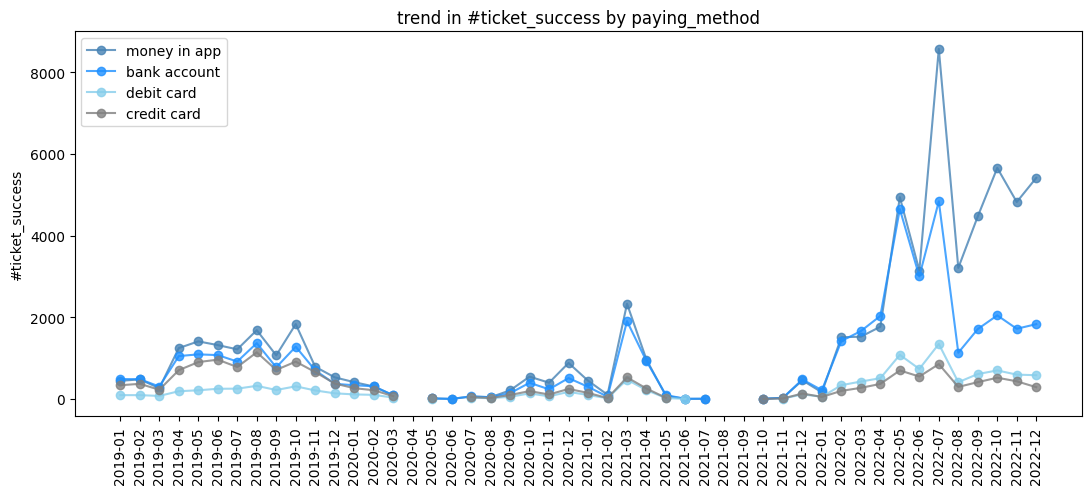

In [ ]:
# Xu hướng của phương thức thanh toán theo thời gian

df_paying_method_month = (
    df[(df['status_id'] == 1) & (df['paying_method'] != 'other' )]
    .groupby(['year_month','paying_method'])
    .agg(
        n_ticket_success = ('ticket_id', 'count')
    ).sort_values(by='year_month').reset_index()
)

payingmethod_color = [{
    'money in app': 'steelblue',
    'bank account': 'dodgerblue',
    'debit card': 'skyblue',
    'credit card': 'gray',
}]

plt.figure(figsize=(13,5))
for payingmethod, color in payingmethod_color[0].items():
  df_paying_method_month_area = df_paying_method_month[df_paying_method_month['paying_method'] == payingmethod]
  df_paying_method_month_area_dim = df_paying_method_month_area.merge(dim_time, on='year_month', how='right')
  plt.plot(df_paying_method_month_area_dim['year_month']
         , df_paying_method_month_area_dim['n_ticket_success']
         , label=payingmethod
         , color=color
           , alpha = 0.8
           , marker = 'o')
plt.xticks(rotation = 90)
plt.title('trend in #ticket_success by paying_method')
plt.ylabel('#ticket_success')

plt.legend()
plt.show()


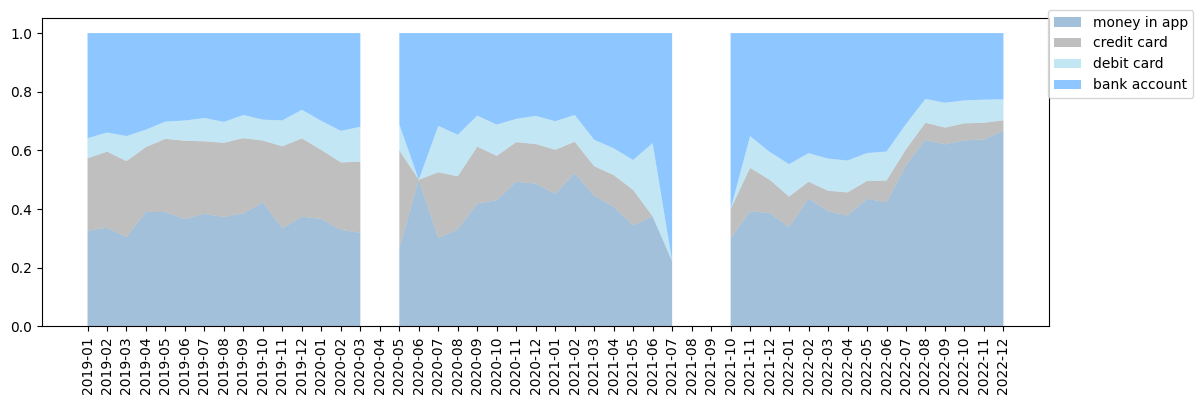

In [ ]:
# Tỷ trọng của các hình thức thanh toán theo thời gian
df_paying_method_month_pivot = df_paying_method_month.pivot_table(
    index='year_month',
    columns='paying_method',
    values='n_ticket_success',
    aggfunc='sum'
).reset_index()

# copy bảng mới
df_paying_method_month_pivot_pct = df_paying_method_month_pivot.copy()

# 1/. Tạo cột Total
df_paying_method_month_pivot_pct['total'] = df_paying_method_month_pivot_pct.iloc[:,1:].sum(axis=1)

# 2/. Tính % các cột method
for i in df_paying_method_month_pivot_pct.columns[1:5]:
  df_paying_method_month_pivot_pct[i + '_pct'] = df_paying_method_month_pivot_pct[i]/df_paying_method_month_pivot_pct['total']

df_paying_method_month_pivot_pct = df_paying_method_month_pivot_pct.fillna(0)

# 3/. Fill thời gian bị thiếu trên chuỗi thời gian
df_paying_method_month_pivot_pct = df_paying_method_month_pivot_pct.merge(dim_time, on='year_month', how='right')

# 4/. Trực quan hoá theo stacked area chart
plt.figure(figsize=(13,4))
plt.stackplot(df_paying_method_month_pivot_pct['year_month']
              ,df_paying_method_month_pivot_pct['money in app_pct']
              ,df_paying_method_month_pivot_pct['credit card_pct']
              ,df_paying_method_month_pivot_pct['debit card_pct']
              ,df_paying_method_month_pivot_pct['bank account_pct']
              ,labels=['money in app','credit card','debit card','bank account']
              ,colors=['steelblue','gray','skyblue','dodgerblue']
              ,alpha=0.5)
plt.xticks(rotation = 90)
plt.legend(loc='upper right',bbox_to_anchor=(1.15,1.05))
plt.show()

**Nhận xét:** Trước năm 2022, 2 hình thức thanh toán chính khi mua vé là money in app và bank account. Hình thức credit và debit card cũng đóng vai trò không nhỏ. Tuy nhiên, từ 2021 trở đi và điển hình ở 2022:
- Credit card và debit card giảm đáng kể và dần bị thay thế
- Kể từ sau 2022, money in app cũng dần chiếm ưu thế.
> Insight:
> - Khách hàng dần tin tưởng hơn khi để tiền vào app để thanh toán vé thay vì thông qua các đối tác thứ ba.
> - Điều này cũng là điểm sáng, vì như vậy công ty sẽ dễ khắc phục lỗi khi thanh toán và mang đến trải nghiệm tốt nhất.
> ***Question:** Nhưng liệu lỗi do thanh toán có phải là vấn đề lớn của công ty


## Customer Experience

### Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ticket_id           154827 non-null  object        
 1   customer_id         154827 non-null  int64         
 2   paying_method       154827 non-null  object        
 3   theater_name        154827 non-null  float64       
 4   device_number       154827 non-null  object        
 5   original_price      154827 non-null  float64       
 6   discount_value      154827 non-null  float64       
 7   final_price         154827 non-null  float64       
 8   time                154827 non-null  datetime64[ns]
 9   status_id           154827 non-null  int64         
 10  campaign_id         154827 non-null  int64         
 11  movie_name          154827 non-null  object        
 12  campaign_type       154827 non-null  object        
 13  usergender          154827 no

In [ ]:
def count_promotion(x):
  return (x == 'promotion').sum() # Thêm hàm tính số promotion KH đã sử dụng khi đặt vé

df['day'] = pd.to_datetime(df['time'].dt.date) # Thêm cột date để tính số ngày khách hàng đã đến rạp xem phim trong 4 năm qua

In [ ]:
df_cus_overview_1 = (
    df[df['status_id'] == 1]
    .groupby('customer_id')
    .agg(
        n_ticket_success = ('ticket_id', 'count'),    # Số vé KH đặt thành công
        s_discount_value = ('discount_value', 'sum'), # Tổng giá trị discount KH nhận
        s_original_price = ('original_price', 'sum'), # Tổng giá trị KH đã mua (theo giá gốc)
        s_final_price = ('final_price', 'sum'),       # Tổng giá trị KH đã mua (theo giá bán)
        n_promotion = ('promotion', count_promotion), # Số promotion KH đã sử dụng
        n_days = ('day', 'nunique')                   # Số ngày KH đã đến rạp xem phim
    )
)
sum(df_cus_overview_1['n_ticket_success'])

133768

In [ ]:
def count_fail(x):
  return (x != 1).sum()

df_cus_overview_2 = (
    df
    .groupby('customer_id')
    .agg(
        n_ticket = ('ticket_id', 'count'),        # Tổng số ticket KH đã đặt
        n_ticket_fail = ('status_id', count_fail) # Tổng số ticket KH fail
    )
)
df_cus_overview_2.head(2)

,n_ticket,n_ticket_fail
customer_id,,
100001,1,0
100003,6,0


In [ ]:
sum(df_cus_overview_2['n_ticket_fail'])

21059

In [ ]:
133768 + 21059

154827

In [ ]:
df_cus_overview = pd.merge(df_cus_overview_1, df_cus_overview_2, on='customer_id', how='right').fillna(0)
df_cus_overview.head(2)

,n_ticket_success,s_discount_value,s_original_price,s_final_price,n_promotion,n_days,n_ticket,n_ticket_fail
customer_id,,,,,,,,
100001,1.0,2.06,7.42,5.36,1.0,1.0,1,0
100003,6.0,2.56,60.95,58.39,1.0,6.0,6,0


In [ ]:
sum(df_cus_overview['n_ticket_fail'])

21059

In [ ]:
df_cus_overview['success_rate'] = df_cus_overview['n_ticket_success']/df_cus_overview['n_ticket']
df_cus_overview['promotion_rate'] = df_cus_overview['n_promotion']/df_cus_overview['n_ticket_success']
df_cus_overview['discount_rate'] = df_cus_overview['s_discount_value']/df_cus_overview['s_original_price']
df_cus_overview.head(2)

,n_ticket_success,s_discount_value,s_original_price,s_final_price,n_promotion,n_days,n_ticket,n_ticket_fail,success_rate,promotion_rate,discount_rate
customer_id,,,,,,,,,,,
100001,1.0,2.06,7.42,5.36,1.0,1.0,1,0,1.0,1.000000,0.277628
100003,6.0,2.56,60.95,58.39,1.0,6.0,6,0,1.0,0.166667,0.042002


In [ ]:
df_cus_overview.reset_index(inplace = True)

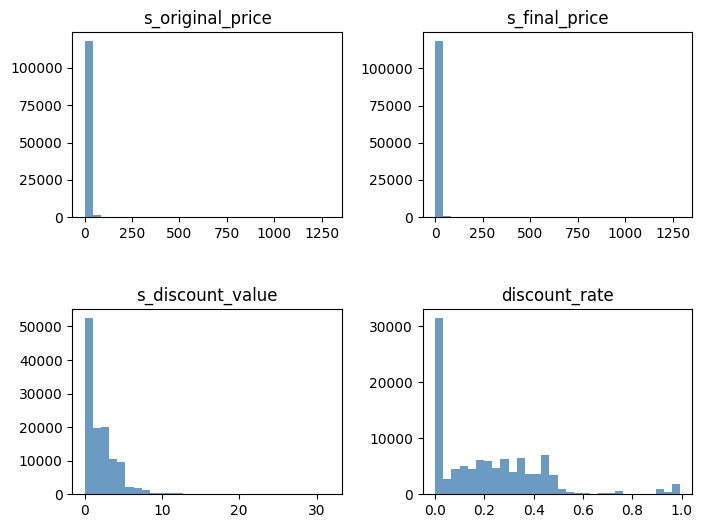

In [ ]:
# Hiển hiện phân phối của các giá trị trong bảng

df_cus_overview[['s_original_price', 's_final_price', 's_discount_value', 'discount_rate']].hist(bins=30
                                ,figsize=(8,6)
                                ,grid = False
                                ,color = 'steelblue'
                                ,alpha=0.8)
# Điều chỉnh khoảng cách
plt.subplots_adjust(hspace = 0.5)
plt.show()

**Nhận xét**:
- Doanh thu mà từng khách hàng mang đến rạp phim khá thấp.
> Giả thuyết: Có thể họ đi xem phím rất ít
- Có 30,000 KH luôn mua vé với giá nguyên
> Giả thuyết:
> 1. Họ khong biết đến các chương trình
> 2. Họ Chỉ xem một lần rồi thôi

...

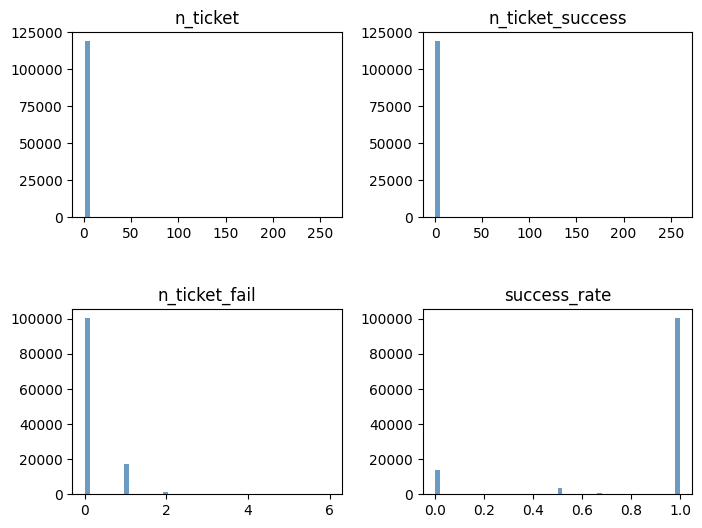

In [ ]:
df_cus_overview[['n_ticket', 'n_ticket_success', 'n_ticket_fail', 'success_rate']].hist(bins=50
                                ,figsize=(8,6)
                                ,grid = False
                                ,color = 'steelblue'
                                ,alpha=0.8)
# Điều chỉnh khoảng cách
plt.subplots_adjust(hspace = 0.5)
plt.show()

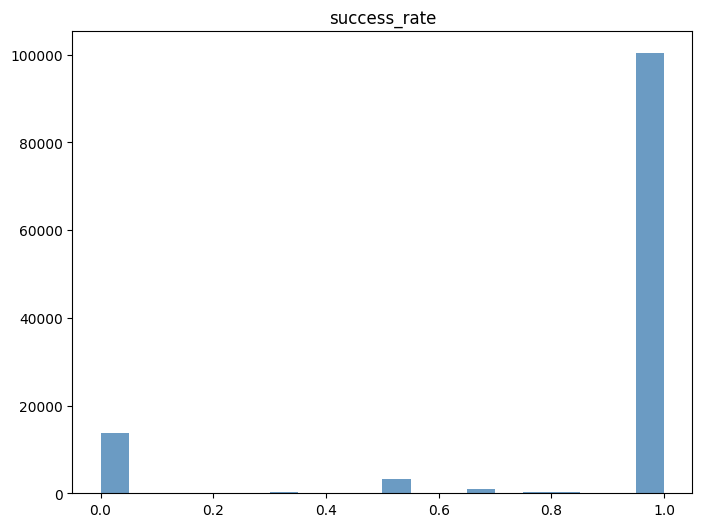

In [ ]:
df_cus_overview[[ 'success_rate']].hist(bins=20
                                ,figsize=(8,6)
                                ,grid = False
                                ,color = 'steelblue'
                                ,alpha=0.8)
# Điều chỉnh khoảng cách
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [ ]:
print('Số KH: ', df_cus_overview['customer_id'].count())
print('Số KH mua vé thành công: ', df_cus_overview[df_cus_overview['n_ticket_success'] != 0]['customer_id'].count())
print('Số KH mua vé thất bại: ', df_cus_overview[df_cus_overview['n_ticket_fail'] != 0]['customer_id'].count())
print('Số KH thất bại 100%: ', df_cus_overview[df_cus_overview['success_rate'] == 0]['customer_id'].count())
print(13701/119477)

Số KH:  119477
Số KH mua vé thành công:  105776
Số KH mua vé thất bại:  19166
Số KH thất bại 100%:  13701
0.11467479096395122


**Nhận xét**:
- Có đến 19,166 KH ít nhất đặt vé thất bại 1 lần
- Và 13,701 KH đặt vé thất bại 100%.
> Action: Tìm nguyên nhân là gì mà 100% KH thất bại

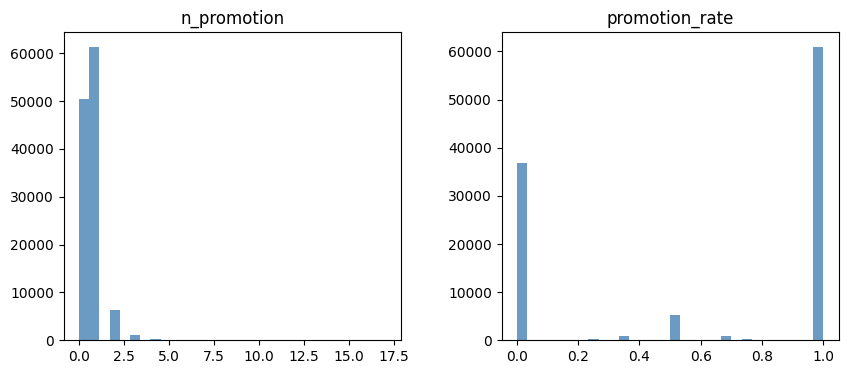

In [ ]:
df_cus_overview[['n_promotion', 'promotion_rate']].hist(bins=30
                                ,figsize=(10,4)
                                ,grid = False
                                ,color = 'steelblue'
                                ,alpha=0.8)
# Điều chỉnh khoảng cách
plt.subplots_adjust(hspace = 0.3)
plt.show()

**Nhận xét**:
- Có 60,000 KH chỉ nhận 1 lần promotion
- Cũng có 60,000 KH nhận 100% promotion cho các vé của mình
> Giả thuyết:
> - Có phải 60,000 KH nhận 1 lần là 60,000 nhận 100% promotion
> - Nếu vậy, họ chỉ tham gia xem phim nhờ đợt promotion và không quay lại.
> - Nếu đúng, phải đánh giá chương trình promotion thời điểm ấy.
- Promotion_rate = 100% cao cho thấy hai vấn đề
> - 1/. Nếu KH chỉ đến 1 lần: Chỉ thu hút nhưng không giữ chân, tốn CAC và lifetime value thấp.
> - 2/. Nếu KH đến từ 2 lần trở lên: tốn CAC và phải tiếp tục giữ chân KH bằng promotion (chi phí retention cao). Cũng thể hiện 1 điều là chất lượng sản phẩm kém nên không giữ chân được nhiều KH.

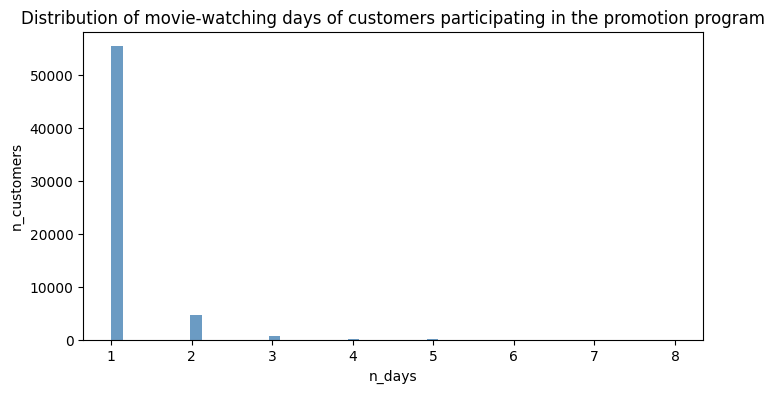

In [144]:
df_cus_overview[df_cus_overview['promotion_rate']==1][['n_days']].hist(bins=50
                                ,figsize=(8,4)
                                ,grid = False
                                ,color = 'steelblue'
                                ,alpha=0.8)
# Điều chỉnh khoảng cách
plt.subplots_adjust(hspace = 0.5)
plt.title('Distribution of movie-watching days of customers participating in the promotion program')
plt.ylabel('n_customers')
plt.xlabel('n_days')
plt.show()

In [ ]:
print('Số KH chỉ đến xem 1 lần: ', df_cus_overview[df_cus_overview['n_days'] == 1]['customer_id'].count())
print('Số KH chỉ đến xem 2 lần: ', df_cus_overview[df_cus_overview['n_days'] == 2]['customer_id'].count())
print('Số KH chỉ đến xem từ 3 lần trở lên: ', df_cus_overview[df_cus_overview['n_days'] > 2]['customer_id'].count())
print('Số KH chỉ đến xem 1 lần và có promotion: ', df_cus_overview[(df_cus_overview['n_days'] == 1) & (df_cus_overview['n_promotion'] ==1 )]['customer_id'].count())

Số KH chỉ đến xem 1 lần:  88521
Số KH chỉ đến xem 2 lần:  12483
Số KH chỉ đến xem từ 3 lần trở lên:  4772
Số KH chỉ đến xem 1 lần và có promotion:  55168


**Nhận xét:**
- Có 88,521 KH chỉ đến xem phim 1 lần rồi từ bỏ luôn (khoảng 74,1%)
- Chỉ có 10% KH quay lại xem lần 2
- Và từ 3 lần trở lên chỉ chiếm 4% tổng số KH.
> ==> Tỷ lệ retention rất thấp
- Bên cạnh đó, có tới 46% KH chỉ đến xem phim từ đợt promotion và sau đó từ bỏ thương hiệu.
> ==> Chương trình promotion chỉ kéo được khách hàng mới cho 1 lần và không giữ chân được. Như vậy sẽ ảnh hưởng nhiều đến CAC và Lifetime Value của 1 KH. Chi phí acquisition được họ nhiều nhưng giá trị 1 KH mang lại ít.

### Product Quality (Ticket_fail)

In [ ]:
# Các lỗi mà hệ thống gặp phải
# 1/. external
# 2/. customer
# 3/. internal

df['error_group'].unique()

array(['none', 'external', 'customer', 'internal'], dtype=object)

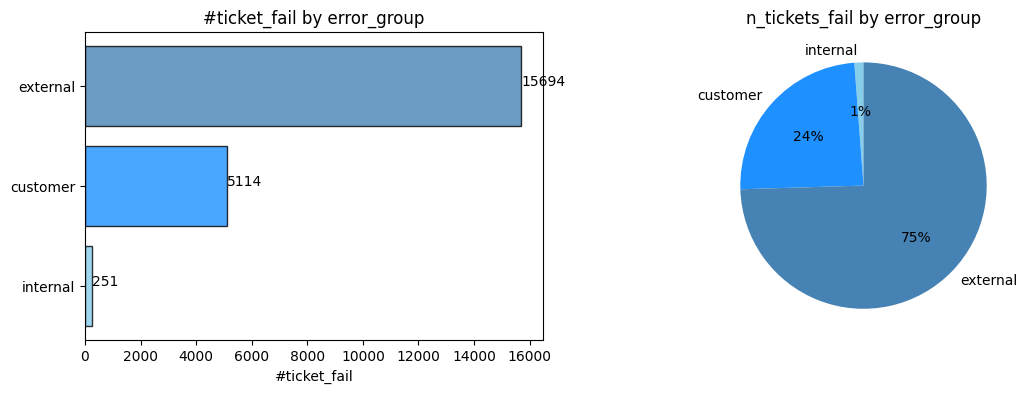

In [ ]:
# Phân tích tỷ trọng các lỗi

df_error = (
    df[df['status_id'] != 1]
    .groupby('error_group')
    .agg(
        n_ticket_fail = ('ticket_id', 'count')
    )
).sort_values(by='n_ticket_fail').reset_index()

# Trực quan
plt.figure(figsize=(13,4))
# 1/. Trực quan biểu đồ cột ngang
ax1 = plt.subplot(1,2,1)
plt.barh(df_error['error_group']
         , df_error['n_ticket_fail']
         , color=df_error['error_group'].replace({
             'external': 'steelblue',
             'customer': 'dodgerblue',
             'internal': 'skyblue'
         })
         , edgecolor='black'
         , alpha = 0.8
)
for index, value in enumerate(df_error['n_ticket_fail']):
    plt.text(value, index, str(value))
plt.title('#ticket_fail by error_group')
plt.xlabel('#ticket_fail')

# 2/. Trực quan biểu đồ tròn

ax2 = plt.subplot(1,2,2)
plt.pie(df_error['n_ticket_fail']
        , labels=df_error['error_group']
        , autopct='%1.0f%%'
        , colors= df_error['error_group'].replace({
             'external': 'steelblue',
             'customer': 'dodgerblue',
             'internal': 'skyblue'
         })
        , startangle = 90
        , textprops={'fontsize': 10}
)

plt.title('n_ticket_fail by error_group')
plt.show()

**Nhận xét:**
- Lỗi chủ yếu đến từ external (75%)
- Question: Theo thời gian thì như thế nào, lỗi external giảm không và customer có tăng không???

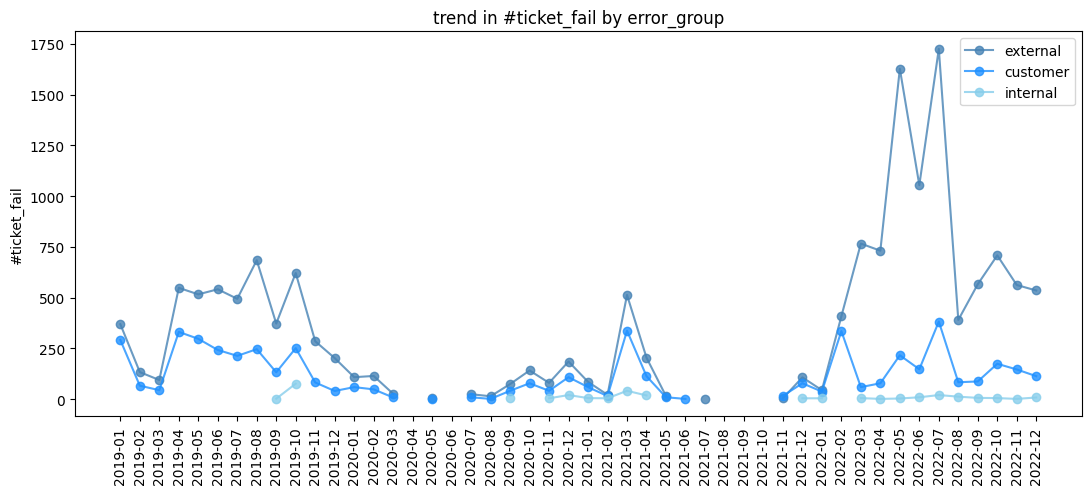

In [ ]:
# Phân tích lỗi theo thời gian

df_error_month = (
    df[df['status_id'] != 1]
    .groupby(['year_month','error_group'])
    .agg(
        n_ticket_fail = ('ticket_id', 'count')
    ).sort_values(by='year_month').reset_index()
)

error_color = [{
    'external': 'steelblue',
    'customer': 'dodgerblue',
    'internal': 'skyblue'
}]

plt.figure(figsize=(13,5))

for error, color in error_color[0].items():
  df_error_month_area = df_error_month[df_error_month['error_group'] == error]
  df_error_month_area_dim = df_error_month_area.merge(dim_time, on='year_month', how='right')
  plt.plot(df_error_month_area_dim['year_month']
         , df_error_month_area_dim['n_ticket_fail']
         , label=error
         , color=color
           , alpha = 0.8
           , marker = 'o')
plt.xticks(rotation = 90)
plt.title('trend in #ticket_fail by error_group')
plt.ylabel('#ticket_fail')

plt.legend()
plt.show()

**Nhật xét:**
- Lỗi từ external từ 2019 đã cao đáng kể nhưng đến 2022, lỗi này càng nặng hơn
- Lỗi từ customer vẫn duy trì và biến động ở 1 mức nhất đinh
- Lỗi từ internal gần như hiếm gặp
> ==> Đây là tín hiệu rất tiêu cực vì lỗi từ external sẽ khó kiểm soát và khắc phục vì nằm bên ngoài phạm vi điều hành của doanh nghiệp. Vậy lỗi từ external và customer là gì mà lại cao vậy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ticket_id           154827 non-null  object        
 1   customer_id         154827 non-null  int64         
 2   paying_method       154827 non-null  object        
 3   theater_name        154827 non-null  float64       
 4   device_number       154827 non-null  object        
 5   original_price      154827 non-null  float64       
 6   discount_value      154827 non-null  float64       
 7   final_price         154827 non-null  float64       
 8   time                154827 non-null  datetime64[ns]
 9   status_id           154827 non-null  int64         
 10  campaign_id         154827 non-null  int64         
 11  movie_name          154827 non-null  object        
 12  campaign_type       154827 non-null  object        
 13  usergender          154827 no

In [ ]:
# Phân tích lỗi từ external và customer

df_error_detail = (
    df[df['error_group'].isin(list(['external', 'customer']))]
    .groupby(['error_group','description'])
    .agg(
        n_ticket_fail = ('ticket_id', 'count')
    ).reset_index()
)
df_error_detail

,error_group,description,n_ticket_fail
0,customer,Insufficient funds in customer account. Please...,2616
1,customer,Need verify your account to continue,1112
2,customer,Password locked due to multiple incorrect atte...,480
3,customer,Payment overdue,906
4,external,No response from your bank,3603
5,external,Payment failed from bank,12091


**Nhận xét**
> Về phía lỗi của khách hàng:
> - Đa phần là lỗi đến từ chủ quan khách hàng:
>> - Tiền không đủ trong tài khoản
>> - Tài khoản của họ chưa xác thực
>> - Password nhập không đúng
>> - Và, thanh toán bị hết hạn do để quá lâu.

> ==> Đây là có thể là những business rule của công ty và không thể thay đổi để giúp khách hàng khắc phục

> Về phía External
> - Lỗi thường đến từ đối tác thanh toán thứ ba là các Ngân hàng

> Action: Phân tích sâu 02 lỗi trên để đề ra phương án khắc phục.

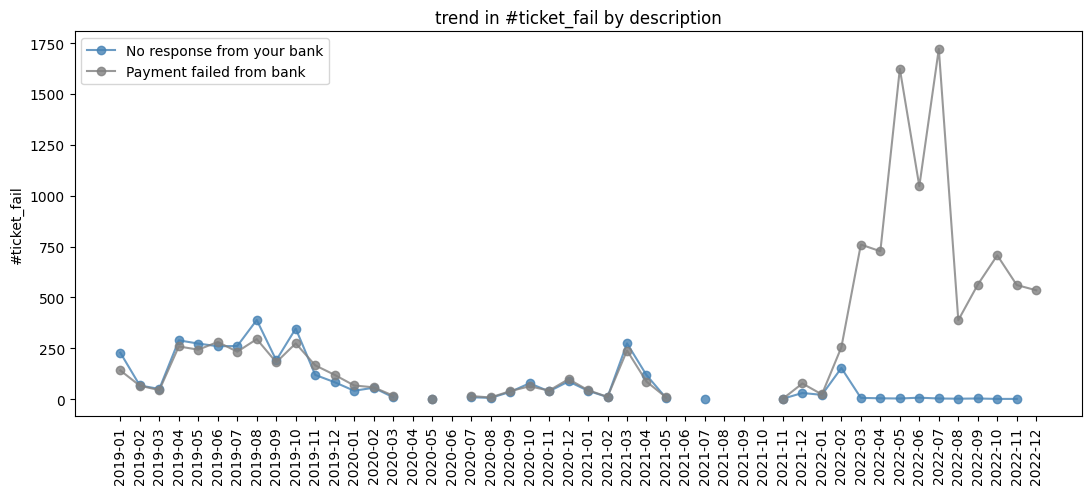

In [ ]:
# Phân tích theo thời gian của 2 về external

df_error_detail_month = (
    df[df['description'].isin(list(['No response from your bank','Payment failed from bank']))]
    .groupby(['year_month','description'])
    .agg(
        n_ticket_fail = ('ticket_id', 'count')
    ).sort_values(by='year_month').reset_index()
)

error_detail_color = [{
    'No response from your bank': 'steelblue',
    'Payment failed from bank': 'gray'
}]

plt.figure(figsize=(13,5))

for error, color in error_detail_color[0].items():
  df_error_detail_month_area = df_error_detail_month[df_error_detail_month['description'] == error]
  df_error_detail_month_area_dim = df_error_detail_month_area.merge(dim_time, on='year_month', how='right')
  plt.plot(df_error_detail_month_area_dim['year_month']
           ,df_error_detail_month_area_dim['n_ticket_fail']
           ,label=error
         , color=color
           , alpha = 0.8
           , marker = 'o')
plt.xticks(rotation = 90)
plt.title('trend in #ticket_fail by description')
plt.ylabel('#ticket_fail')

plt.legend()
plt.show()

**Nhận xét:** Như vậy thì lỗi chính và lớn nhất là do "Payment failed from bank". Cụ thể:
- Giai đoạn trước 2020: No Response và Payment fail ngang nhau,
- nhưng về sau No response được khắc phục và Payment fail tăng đột biến cùng với số lượng KH phục hồi từ đợt này.


### Retention Rate Analysis (Cohort Analysis)

In [ ]:
# import 1 vài thư viện hỗ trợ phân tích
from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns

In [ ]:
# Phân tích cohort thường sẽ tính theo năm khi sản phẩm là xem phim
# Và theo dõi KH quay lại theo từng tháng
# Chính vì thế, cần xác định, khách hàng đến lần đầu vào tháng mấy
# Và theo thời gian, khách hàng có quay lại ở những tháng sau hay không???

In [ ]:
# Phân tích cohort 2019 và 2022, để xem theo thời gian tỷ lể retention có được cải thiện
# 2020 và 2021 là năm covid nặng nề nên rạp phim đóng cửa --> dữ liệu bị ảnh hưởng sâu
# Bước 1: Tính first_month, current_month và subsequent_month của KH
# 1/. First_month là tháng đầu tiên trong năm mà KH đi xem phim (Được đánh số 1)
# 2/. Current_month là tháng thực tế mà KH xem phim
# 3/. Subsequent_month là các tháng tiếp theo mà KH xem phim (Được đánh số 2, 3, 4, ... dựa theo first_momth)

In [ ]:
# Chọn ra năm 2019
df_2019 = df[(df['time'] < '2020-01-01') & (df['status_id'] == 1)]

# Tính first_month
df_2019['first_month'] = df_2019.groupby('customer_id')['time'].transform('min').dt.to_period('M')

<ipython-input-95-e96c114b913f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['first_month'] = df_2019.groupby('customer_id')['time'].transform('min').dt.to_period('M')


In [ ]:
# Tính current_month
df_2019['current_month'] = df_2019['time'].dt.to_period('M')

<ipython-input-96-0bd1cdfccb88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['current_month'] = df_2019['time'].dt.to_period('M')


In [ ]:
# Tính subsequent_month
df_2019['subsequent_month'] = (df_2019['current_month'] - df_2019['first_month']).apply(attrgetter('n'))

<ipython-input-97-6b75668c99fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['subsequent_month'] = (df_2019['current_month'] - df_2019['first_month']).apply(attrgetter('n'))


In [ ]:
# Bước 2: Group số lượng KH theo first, current và subsequent_month

df_2019_cohort = (
    df_2019
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(
        n_customer = ('customer_id', 'nunique') # Tránh việc đếm 1 KH 2 lần trong tháng
    )
    .reset_index()
)

In [ ]:
# Bước 2: Chuyển bảng group thành pivot
df_2019_cohort_pivot = (df_2019_cohort
                        .pivot_table(index='first_month', columns='subsequent_month', values='n_customer')
                        )
df_2019_cohort_pivot.head(12)

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1348.0,50.0,35.0,26.0,25.0,33.0,36.0,29.0,18.0,35.0,21.0,20.0
2019-02,1293.0,58.0,88.0,64.0,78.0,50.0,58.0,30.0,46.0,29.0,35.0,NaN
2019-03,745.0,51.0,48.0,49.0,33.0,33.0,30.0,34.0,23.0,14.0,NaN,NaN
2019-04,2922.0,101.0,103.0,87.0,92.0,66.0,96.0,63.0,42.0,NaN,NaN,NaN
2019-05,3226.0,145.0,118.0,129.0,90.0,93.0,90.0,62.0,NaN,NaN,NaN,NaN
2019-06,3062.0,131.0,151.0,98.0,133.0,114.0,63.0,NaN,NaN,NaN,NaN,NaN
2019-07,2611.0,121.0,79.0,99.0,78.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,3735.0,112.0,155.0,106.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,2169.0,117.0,67.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Lấy cột tổng (index = 0) của bản pivot
cohort_total = df_2019_cohort_pivot.iloc[:,0]

# Chia các cột còn lại cho cột tổng
df_2019_retention_rate = df_2019_cohort_pivot.divide(cohort_total, axis=0)

In [ ]:
df_2019_retention_rate.head(12)

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1.0,0.037092,0.025964,0.019288,0.018546,0.024481,0.026706,0.021513,0.013353,0.025964,0.015579,0.014837
2019-02,1.0,0.044857,0.068059,0.049497,0.060325,0.038670,0.044857,0.023202,0.035576,0.022428,0.027069,NaN
2019-03,1.0,0.068456,0.064430,0.065772,0.044295,0.044295,0.040268,0.045638,0.030872,0.018792,NaN,NaN
2019-04,1.0,0.034565,0.035250,0.029774,0.031485,0.022587,0.032854,0.021561,0.014374,NaN,NaN,NaN
2019-05,1.0,0.044947,0.036578,0.039988,0.027898,0.028828,0.027898,0.019219,NaN,NaN,NaN,NaN
2019-06,1.0,0.042782,0.049314,0.032005,0.043436,0.037231,0.020575,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.046342,0.030257,0.037917,0.029874,0.015320,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.029987,0.041499,0.028380,0.017135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.053942,0.030890,0.017981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


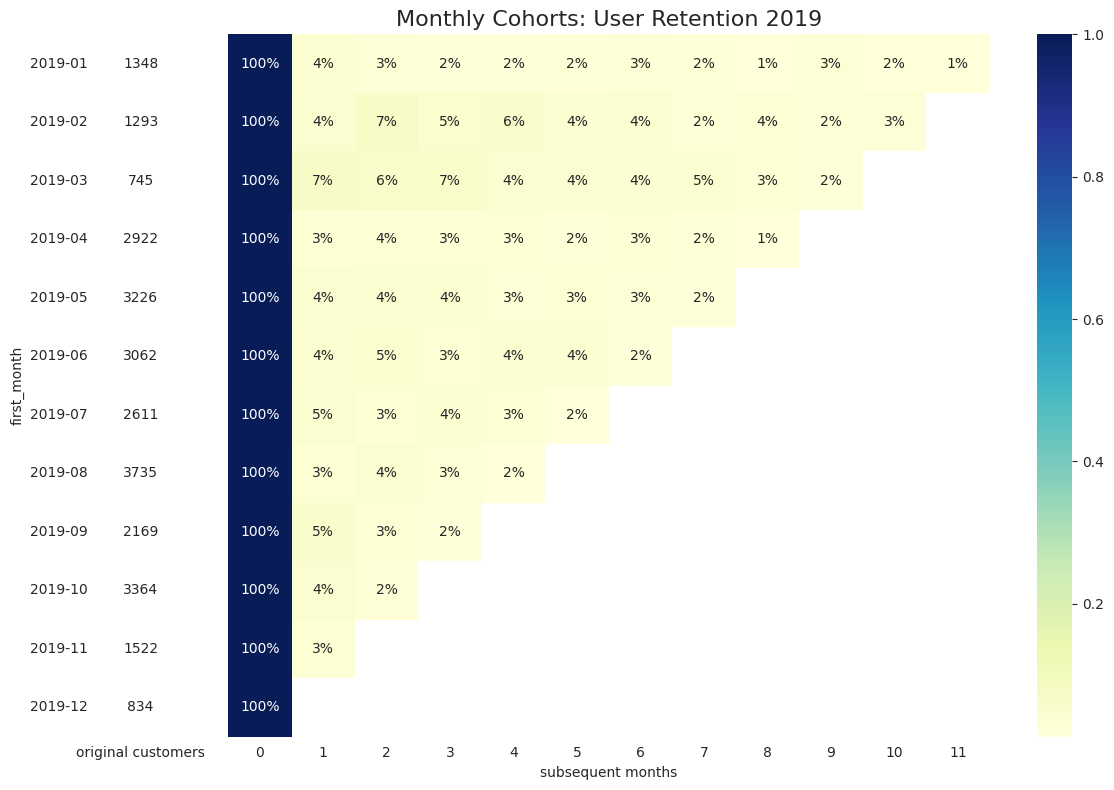

In [ ]:
# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(df_2019_retention_rate,
                mask=df_2019_retention_rate.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2019', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_total_df = pd.DataFrame(cohort_total).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_total_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()

**Nhận xét:** Nhìn tổng thể 2019, tỷ lệ retention thấp
> Action: Tìm nguyên nhân thấp như vậy

> Question: Năm 2022, tỷ lệ này có được cải thiện sau đại dịch???

<ipython-input-103-7815943c7d6c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['first_month'] = df_2022.groupby('customer_id')['time'].transform('min').dt.to_period('M')
<ipython-input-103-7815943c7d6c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['current_month'] = df_2022['time'].dt.to_period('M')
<ipython-input-103-7815943c7d6c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

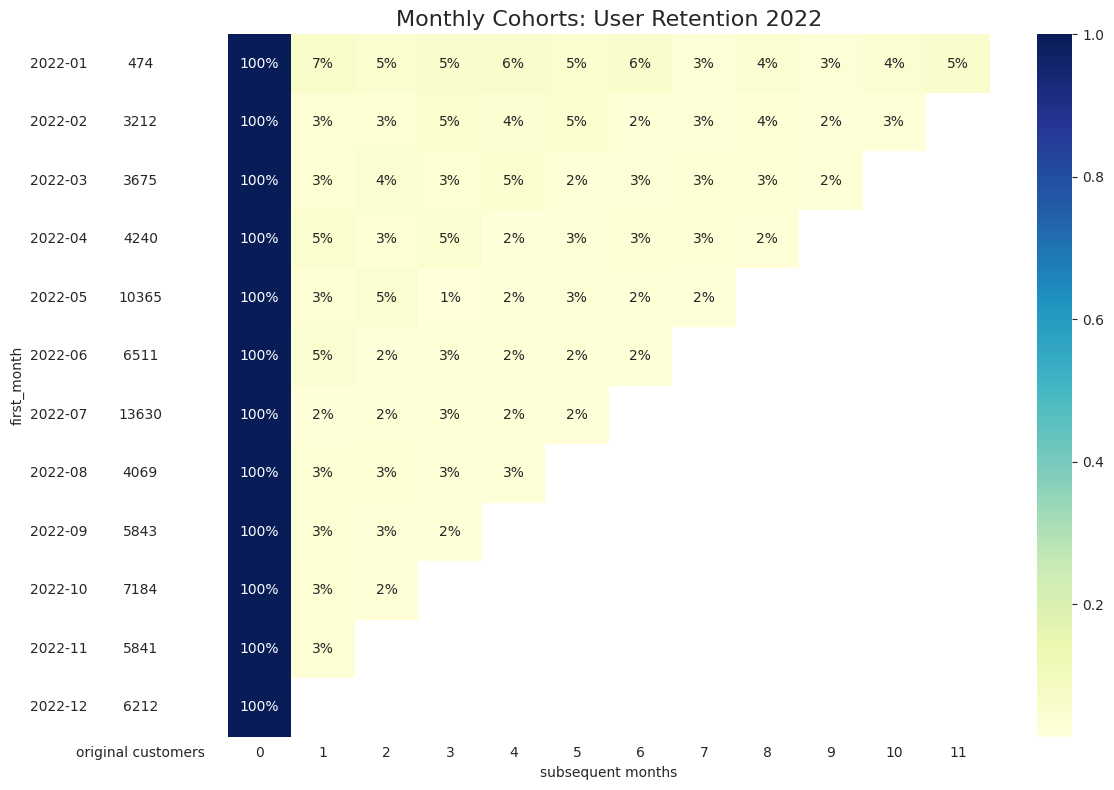

In [ ]:
# Chọn ra năm 2022
df_2022 = df[(df['time'] > '2022-01-01') & (df['status_id'] == 1)]

# Tính first_month
df_2022['first_month'] = df_2022.groupby('customer_id')['time'].transform('min').dt.to_period('M')

# Tính current_month
df_2022['current_month'] = df_2022['time'].dt.to_period('M')

# Tính subsequent_month
df_2022['subsequent_month'] = (df_2022['current_month'] - df_2022['first_month']).apply(attrgetter('n'))

# Bước 2: Group số lượng KH theo first, current và subsequent_month
df_2022_cohort = (
    df_2022
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(
        n_customer = ('customer_id', 'nunique') # Tránh việc đếm 1 KH 2 lần trong tháng
    )
    .reset_index()
)

# Bước 2: Chuyển bảng group thành pivot
df_2022_cohort_pivot = (df_2022_cohort
                        .pivot_table(index='first_month', columns='subsequent_month', values='n_customer')
                        )

# Lấy cột tổng (index = 0) của bản pivot
cohort_total_2022 = df_2022_cohort_pivot.iloc[:,0]

# Chia các cột còn lại cho cột tổng
df_2022_retention_rate = df_2022_cohort_pivot.divide(cohort_total_2022, axis=0)

# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(df_2022_retention_rate,
                mask=df_2022_retention_rate.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2022', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_total_2022_df = pd.DataFrame(cohort_total_2022).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_total_2022_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()

**Nhận xét:** Năm 2022, không có cải thiện gì so với 2019 về tỷ lệ retention. Chứng tỏ, sau đại dịch, công ty chỉ muốn thu hút lại Khách hàng mới.
> Question:
1. Ở 2022, KH đến từ organic hay promotion?
2. Tỷ lệ retention của 2 loại này.

> ==> Từ đó có thể đưa ra quyết định về công ty chỉ tập trung thu hút KH phải hay không?

In [ ]:
# Lọc KH 2022, sắp xếp lại theo KH và thời gian đặt hàng
df_2022_check = (
    df[(df['status_id'] == 1) & (df['time'] >= '2022-01-01')][['customer_id', 'time', 'promotion']]
    .sort_values(by=['customer_id', 'time'])
    .reset_index(drop=True)
)
df_2022_check.head(10)

,customer_id,time,promotion
0,100003,2022-05-22 12:52:12.105,non_promotion
1,100004,2022-12-20 06:26:21.373,non_promotion
2,100007,2022-03-21 17:57:18.460,promotion
3,100009,2022-07-08 17:46:36.145,promotion
4,100009,2022-12-24 09:32:45.477,promotion
5,100013,2022-05-05 12:22:44.587,non_promotion
6,100018,2022-09-07 21:13:17.896,non_promotion
7,100018,2022-11-19 16:25:43.981,promotion
8,100020,2022-05-28 19:09:37.936,promotion
9,100023,2022-05-16 08:45:42.397,promotion


In [ ]:
# Đánh số thứ tự đơn của KH để tìm KH organic và promotion
df_2022_check['order_number'] = df_2022_check.groupby('customer_id').cumcount() + 1
df_2022_check.head(10)

,customer_id,time,promotion,order_number
0,100003,2022-05-22 12:52:12.105,non_promotion,1
1,100004,2022-12-20 06:26:21.373,non_promotion,1
2,100007,2022-03-21 17:57:18.460,promotion,1
3,100009,2022-07-08 17:46:36.145,promotion,1
4,100009,2022-12-24 09:32:45.477,promotion,2
5,100013,2022-05-05 12:22:44.587,non_promotion,1
6,100018,2022-09-07 21:13:17.896,non_promotion,1
7,100018,2022-11-19 16:25:43.981,promotion,2
8,100020,2022-05-28 19:09:37.936,promotion,1
9,100023,2022-05-16 08:45:42.397,promotion,1


In [ ]:
# Thống kê các chỉ số:
print('Tổng số KH mới 2022: ', df_2022_check[df_2022_check['order_number'] == 1]['customer_id'].nunique())
print('Tổng số KH promotion 2022: ', df_2022_check[(df_2022_check['promotion'] == 'promotion') & (df_2022_check['order_number'] == 1)]['customer_id'].nunique())
print('Tổng số KH organic 2022: ', df_2022_check[(df_2022_check['promotion'] == 'non_promotion') & (df_2022_check['order_number'] == 1)]['customer_id'].nunique())


Tổng số KH mới 2022:  71256
Tổng số KH promotion 2022:  46189
Tổng số KH organic 2022:  25067


In [ ]:
df_first_promo_2022_list = list(df_2022_check[(df_2022_check['promotion'] == 'promotion') & (df_2022_check['order_number'] == 1)]['customer_id'].unique())
df_first_organic_2022_list = list(df_2022_check[(df_2022_check['promotion'] == 'non_promotion') & (df_2022_check['order_number'] == 1)]['customer_id'].unique())

In [ ]:
# Tính số KH quay lại của promotion và organic, ít nhất lần 2

df_2022_promo_check = df_2022_check[(df_2022_check['customer_id'].isin(df_first_promo_2022_list))]
df_2022_organic_check = df_2022_check[(df_2022_check['customer_id'].isin(df_first_organic_2022_list))]

In [ ]:
print('Tổng số KH quay lại promotion 2022: ', df_2022_promo_check[df_2022_promo_check['order_number'] == 2]['customer_id'].nunique())
print('Tổng số KH quay lại organic 2022: ', df_2022_organic_check[df_2022_organic_check['order_number'] == 2]['customer_id'].nunique())

Tổng số KH quay lại promotion 2022:  6096
Tổng số KH quay lại organic 2022:  3071


**Nhận xét:**
- KH mới 2022, có 65% từ hoạt động promotion
- Retention_promo = 13% và Retention_orga = 12%

==> Năm 2022, công ty đang muốn thu hút KH nhanh, thu hút KH mới sau đại dịch, chính vì thế hoạt động retention chưa được cải thiện, dẫn đến cả promo và orga để có retention_rate thấp ngang nhau.